In [1]:
import sys
print("Python executable:", sys.executable)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    confusion_matrix, classification_report
)

import warnings
warnings.filterwarnings("ignore")


Python executable: c:\Users\bro\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
# STEP 1: Data Loading & Cleaning

import pandas as pd
import numpy as np

# Load CSV
file_path = r"D:\Py_start\Python\project_SN\project_3\1\synthetic_food_dataset_imbalanced.csv"
df = pd.read_csv(file_path)

# Initial shape
print("Initial dataset shape:", df.shape)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Drop rows with missing values
df = df.dropna()
print("\nShape after dropping rows with missing values:", df.shape)

# Check for duplicate rows
print("\nDuplicate rows before removing:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("Duplicate rows after removing:", df.duplicated().sum())
print("Shape after removing duplicates:", df.shape)

# Quick look at top 5 rows
print("\nSample entries:\n", df.head())


Initial dataset shape: (31700, 16)

Missing values per column:
 Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

Shape after dropping rows with missing values: (31325, 16)

Duplicate rows before removing: 65
Duplicate rows after removing: 0
Shape after removing duplicates: (31260, 16)

Sample entries:
      Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0  290.463673  14.340084  14.152608  35.266644   4.828030  1.291432   
1  212.626748   4.080908  11.621584  23.218957  16.347814  0.130303   
2  330.695408  14.326708  19.747680  29.479164   6.251137  0.794477   
3  198.070798   9.452445   5.47

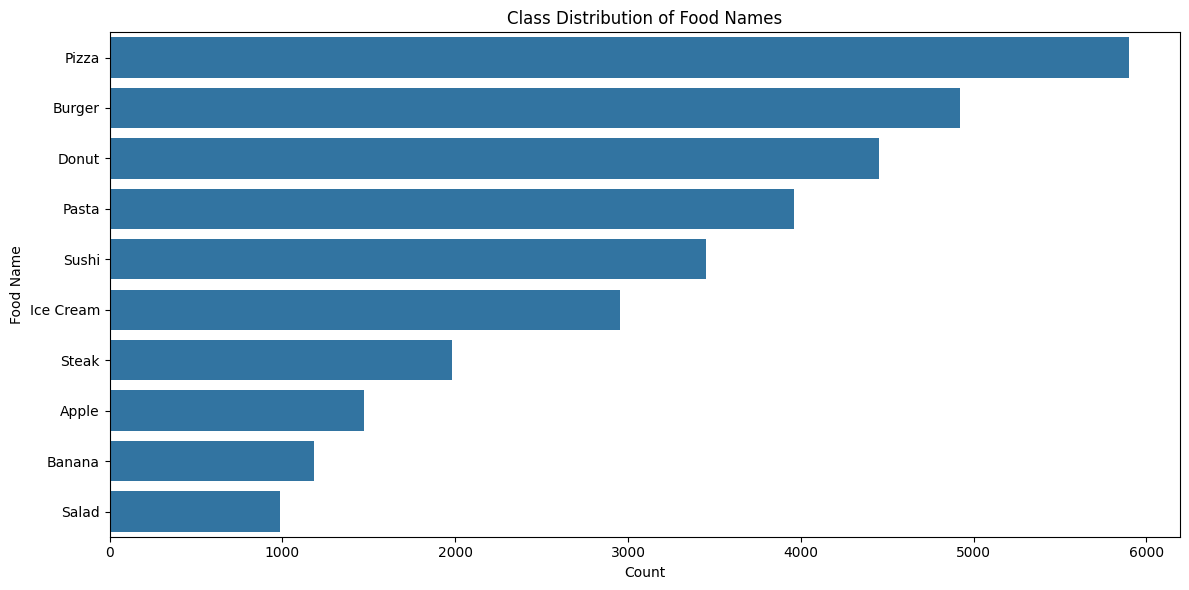

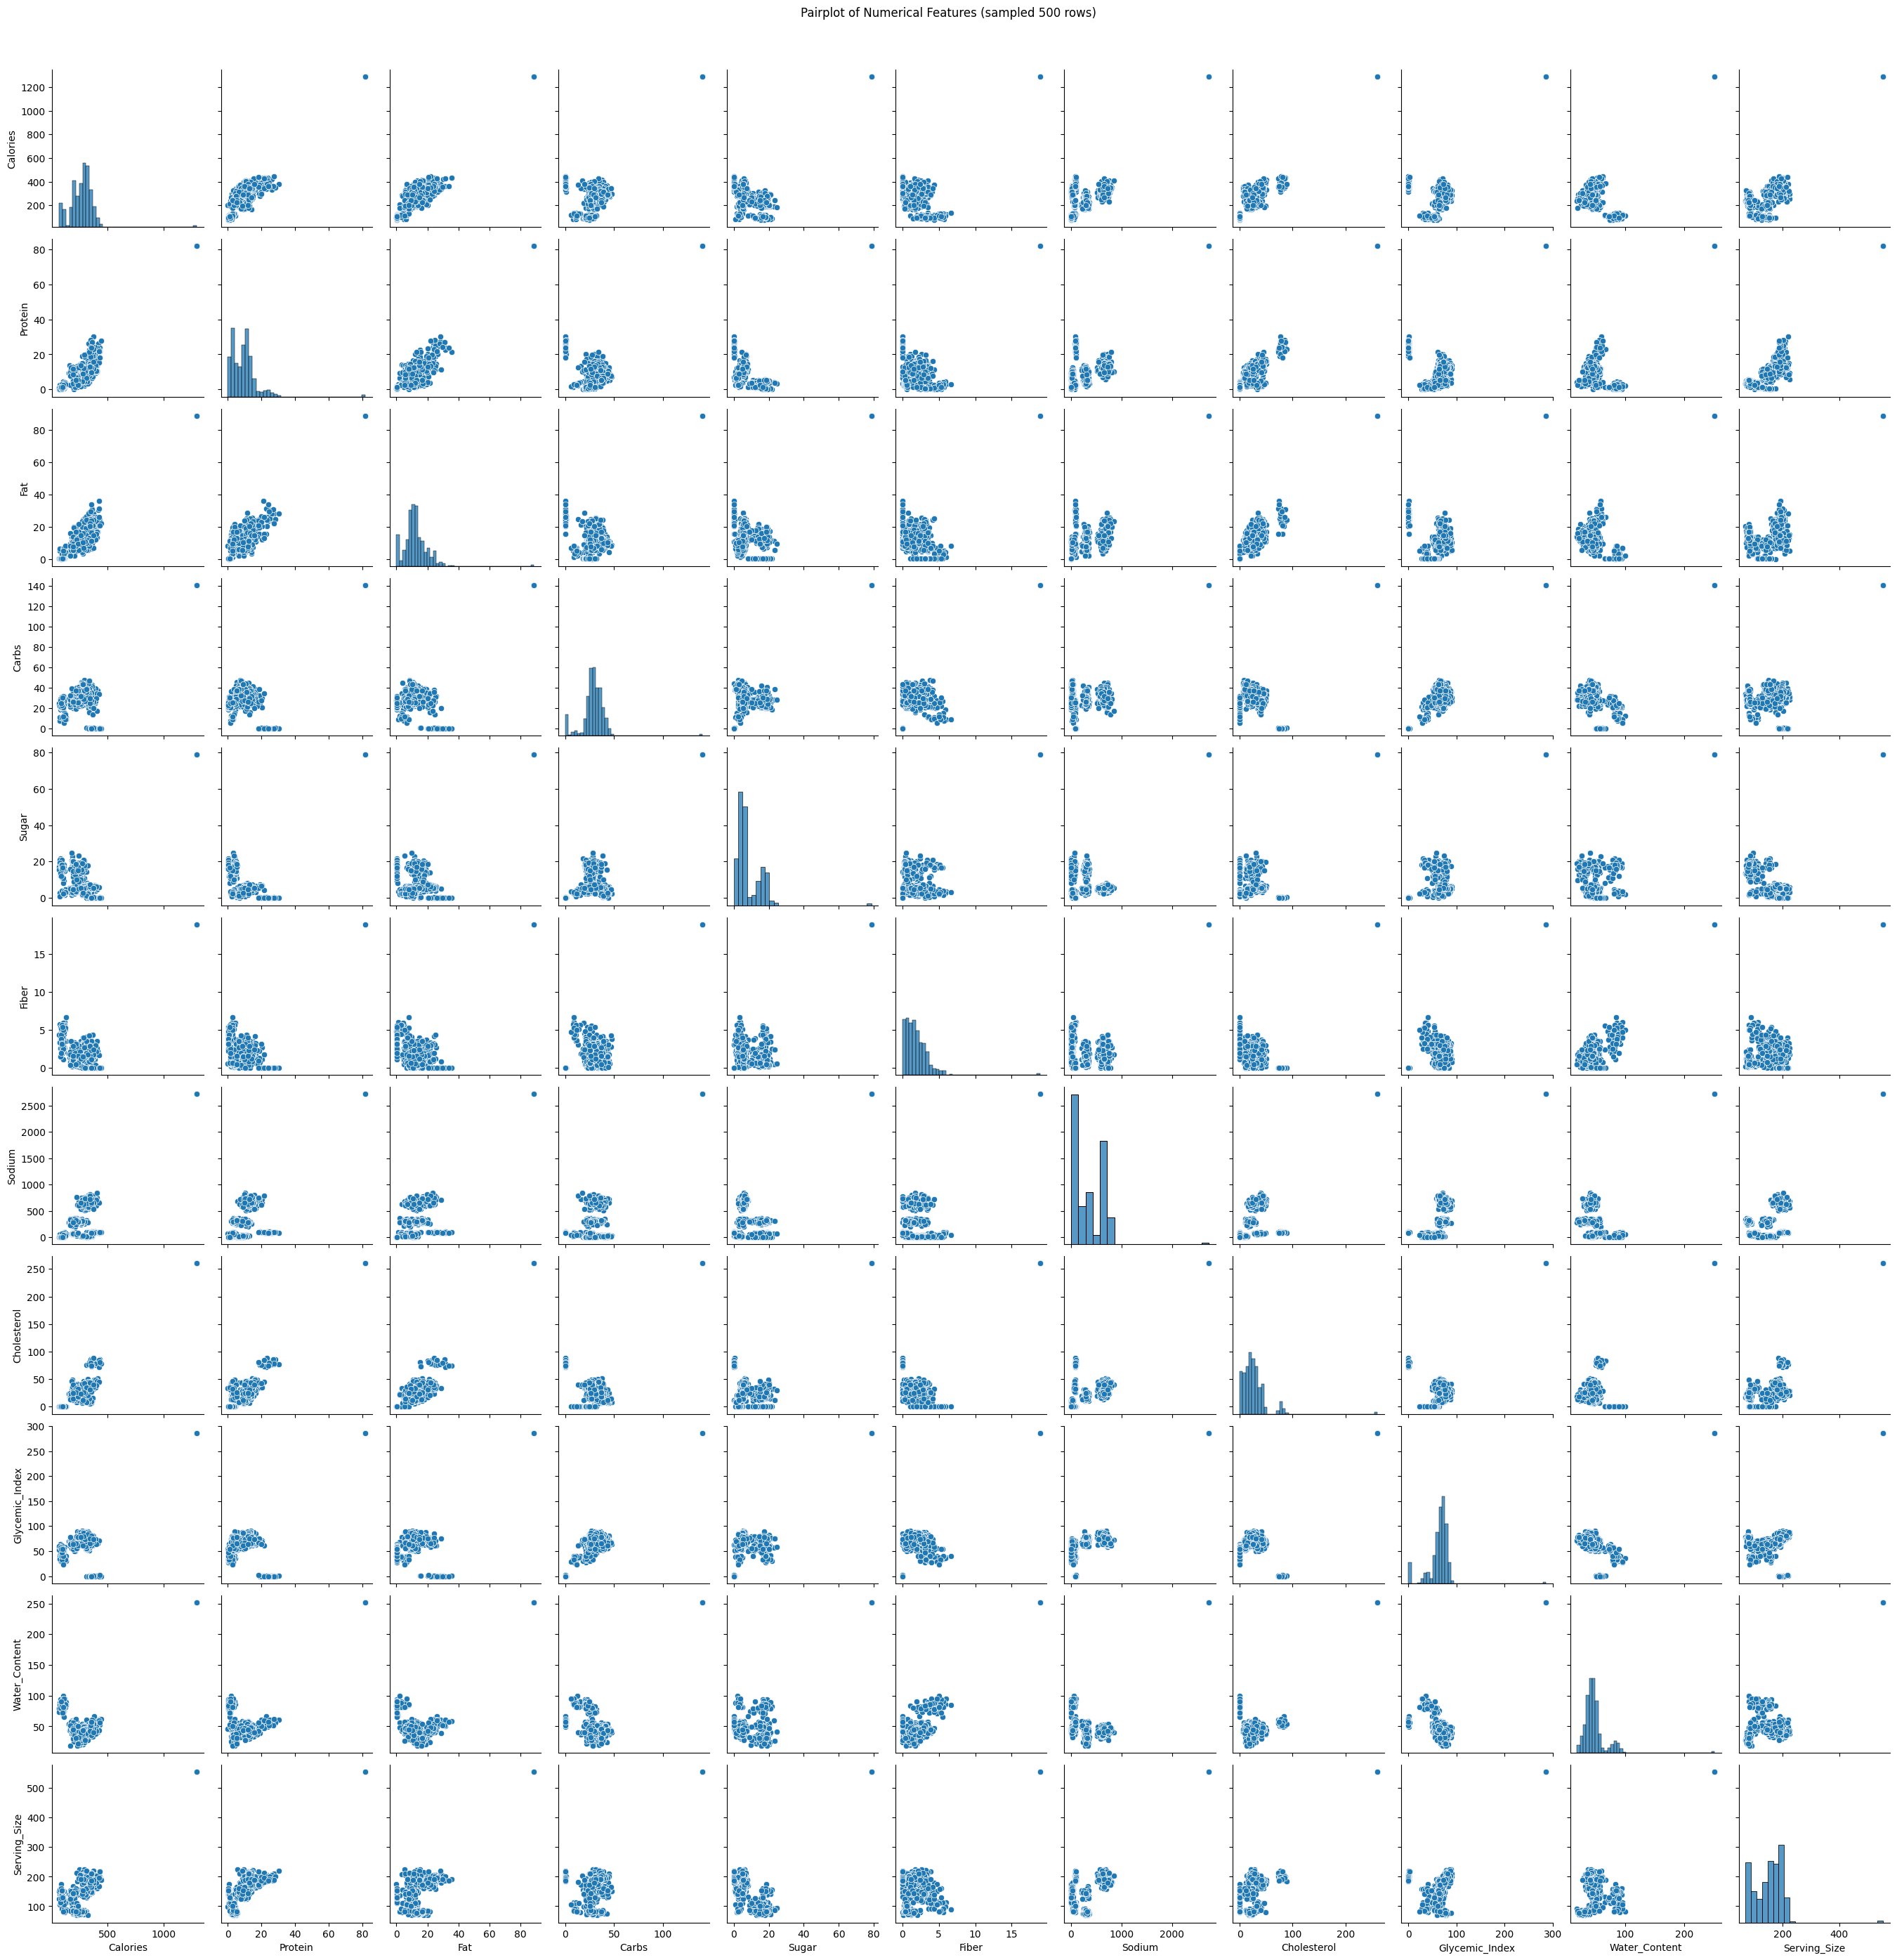

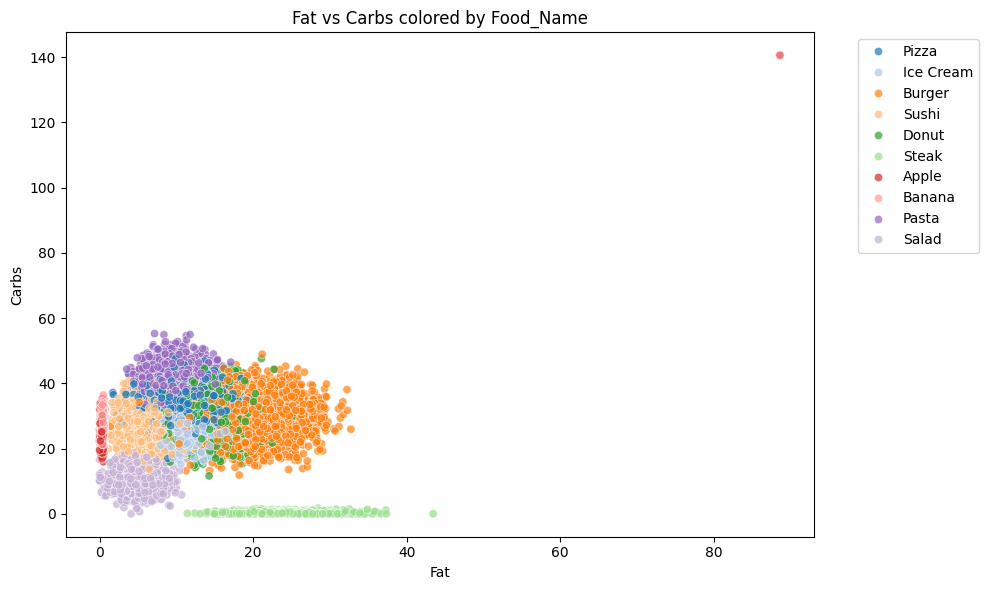

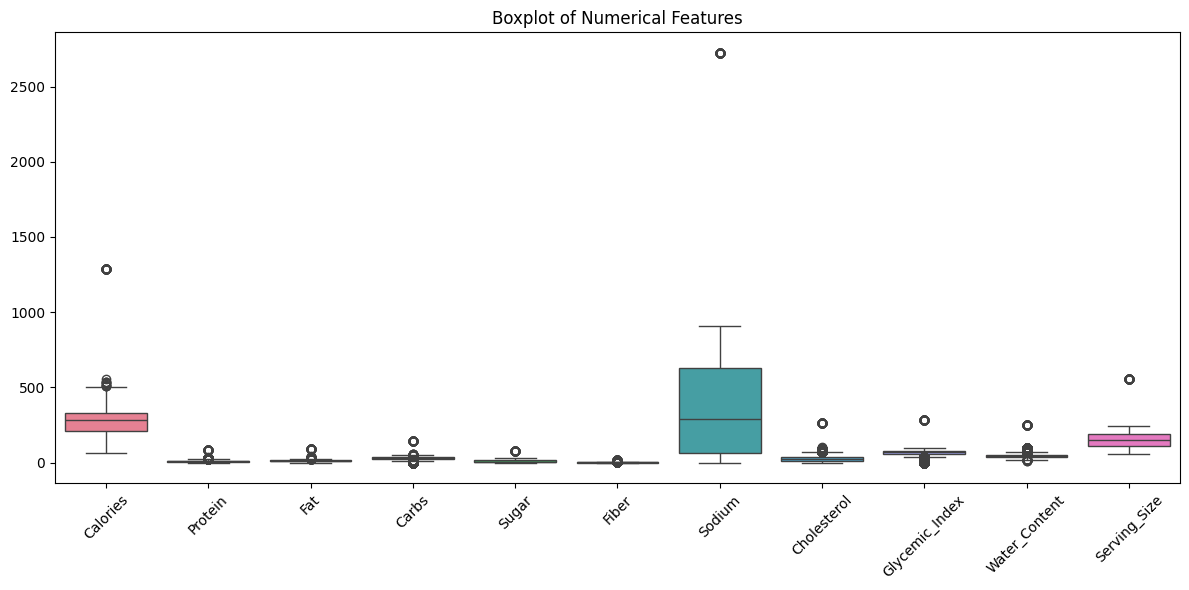

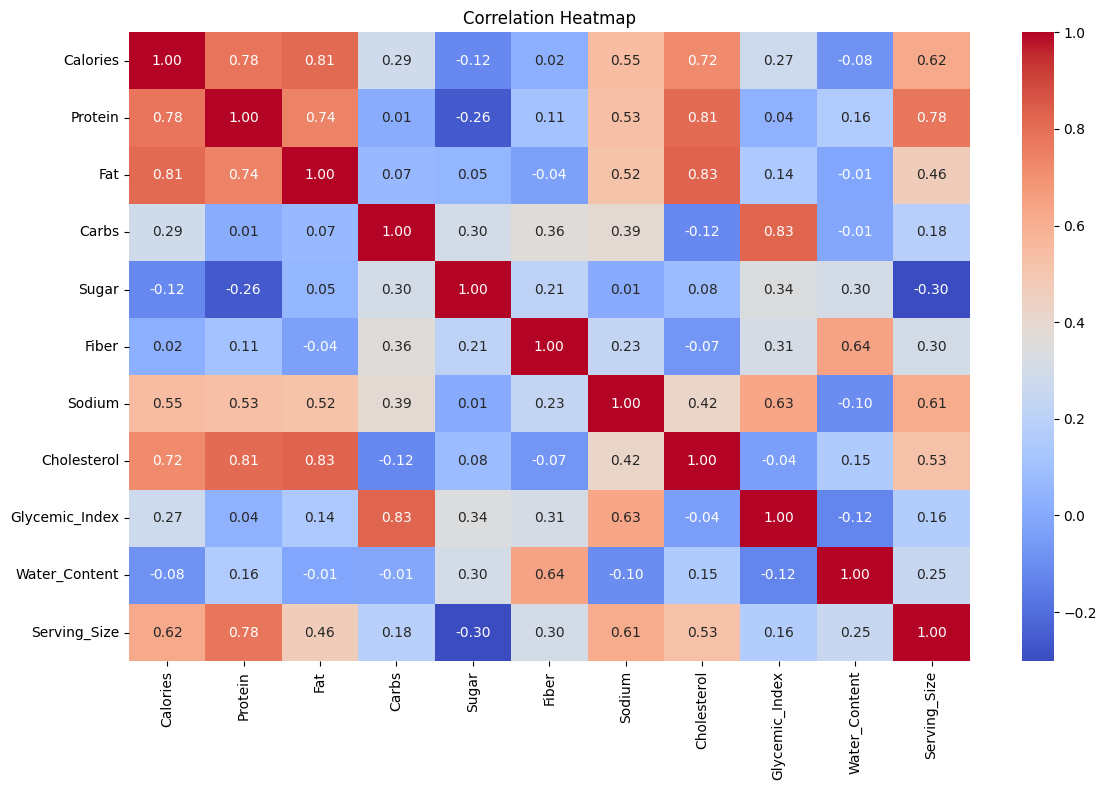

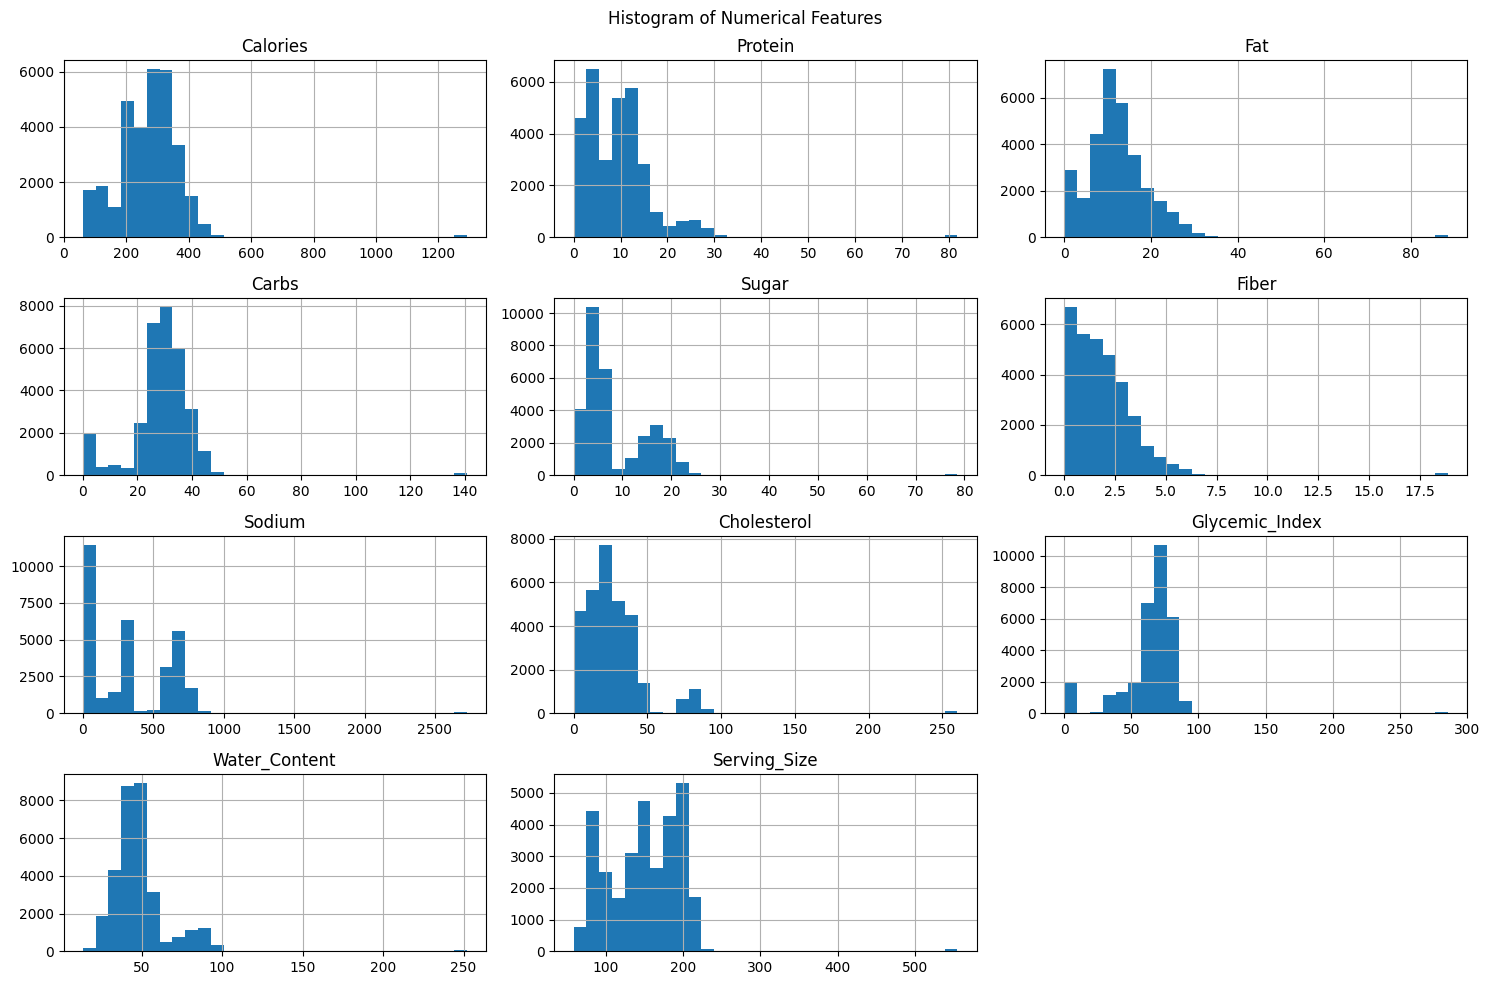

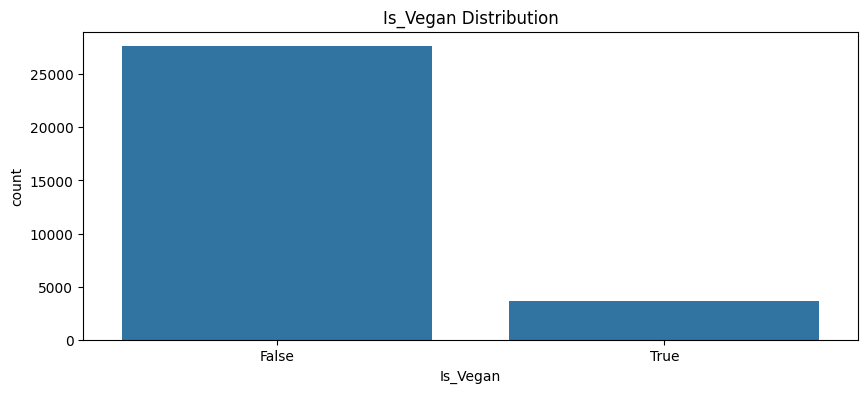

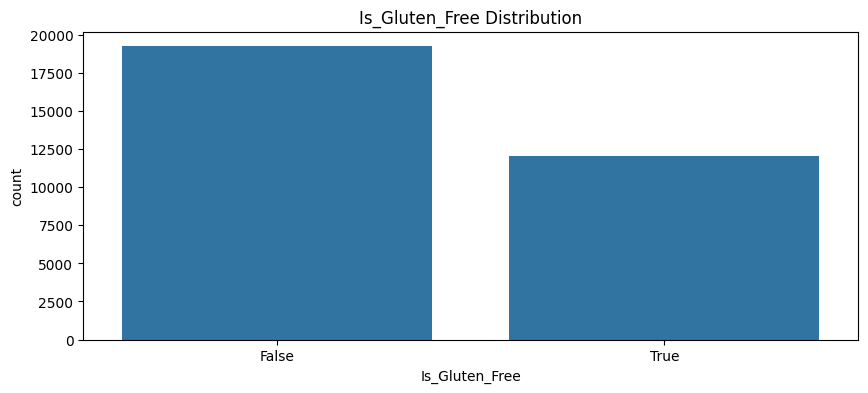

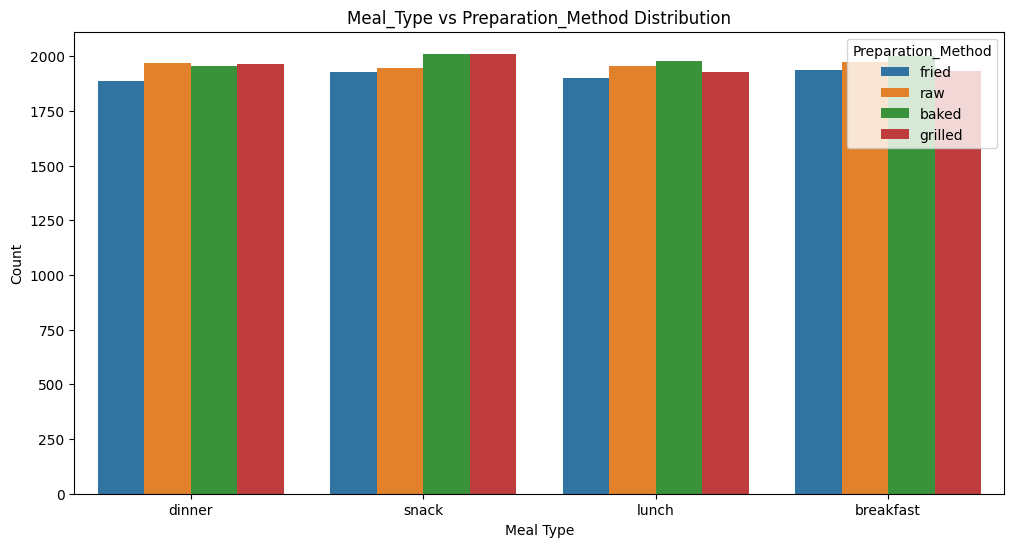

In [3]:
# STEP 2: Exploratory Data Analysis (EDA) & Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Class distribution (Food_Name)
plt.figure(figsize=(12,6))
sns.countplot(y='Food_Name', data=df, order=df['Food_Name'].value_counts().index)
plt.title("Class Distribution of Food Names")
plt.xlabel("Count")
plt.ylabel("Food Name")
plt.tight_layout()
plt.show()

# 2️⃣ Pairplot of numerical features (sample for clarity)
numerical_cols = ['Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium','Cholesterol','Glycemic_Index','Water_Content','Serving_Size']
sns.pairplot(df[numerical_cols].sample(500))  # sample for speed
plt.suptitle("Pairplot of Numerical Features (sampled 500 rows)", y=1.02)
plt.show()

# 3️⃣ Scatter plot: Fat vs Carbs colored by Food_Name
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fat', y='Carbs', hue='Food_Name', data=df, palette='tab20', alpha=0.7)
plt.title("Fat vs Carbs colored by Food_Name")
plt.xlabel("Fat")
plt.ylabel("Carbs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4️⃣ Boxplot to visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5️⃣ Heatmap of correlation among numerical features
plt.figure(figsize=(12,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 6️⃣ Histogram of each numerical feature
df[numerical_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Histogram of Numerical Features")
plt.tight_layout()
plt.show()

# 7️⃣ Countplot for boolean columns (Is_Vegan, Is_Gluten_Free)
plt.figure(figsize=(10,4))
sns.countplot(x='Is_Vegan', data=df)
plt.title("Is_Vegan Distribution")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='Is_Gluten_Free', data=df)
plt.title("Is_Gluten_Free Distribution")
plt.show()

# 8️⃣ Meal_Type vs Preparation_Method counts
plt.figure(figsize=(12,6))
sns.countplot(x='Meal_Type', hue='Preparation_Method', data=df)
plt.title("Meal_Type vs Preparation_Method Distribution")
plt.xlabel("Meal Type")
plt.ylabel("Count")
plt.show()


In [4]:
# STEP 3: Data Preprocessing & Outlier Handling

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# 1️⃣ Drop duplicate rows
print(f"Number of duplicates before dropping: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicates after dropping: {df.duplicated().sum()}")
print(f"Shape after removing duplicates: {df.shape}")

# 2️⃣ Handle missing values
# Columns to impute
important_cols = ['Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium','Cholesterol','Glycemic_Index','Water_Content','Serving_Size']

# Impute with median
imputer = SimpleImputer(strategy='median')
df[important_cols] = imputer.fit_transform(df[important_cols])

print("Missing values after imputation:\n", df.isnull().sum())

# 3️⃣ Cap outliers using IQR method
def cap_outliers_iqr(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return series.clip(lower=lower, upper=upper)

for col in important_cols:
    df[col] = cap_outliers_iqr(df[col])

# 4️⃣ Encode categorical/boolean features
df['Is_Vegan'] = df['Is_Vegan'].astype(int)
df['Is_Gluten_Free'] = df['Is_Gluten_Free'].astype(int)

# Encode categorical text columns
df['Meal_Type'] = df['Meal_Type'].astype('category').cat.codes
df['Preparation_Method'] = df['Preparation_Method'].astype('category').cat.codes

# 5️⃣ Feature & target separation
X = df[['Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium','Cholesterol',
        'Glycemic_Index','Water_Content','Serving_Size','Meal_Type','Preparation_Method',
        'Is_Vegan','Is_Gluten_Free']]
y = df['Food_Name']

# 6️⃣ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7️⃣ Dimensionality reduction (optional)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 8️⃣ Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 9️⃣ Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Preprocessing Complete ✅")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_encoded))}")


Number of duplicates before dropping: 0
Number of duplicates after dropping: 0
Shape after removing duplicates: (31260, 16)
Missing values after imputation:
 Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64
Preprocessing Complete ✅
X_train shape: (25008, 2), X_test shape: (6252, 2)
Number of classes: 10



Training model: Logistic Regression ...


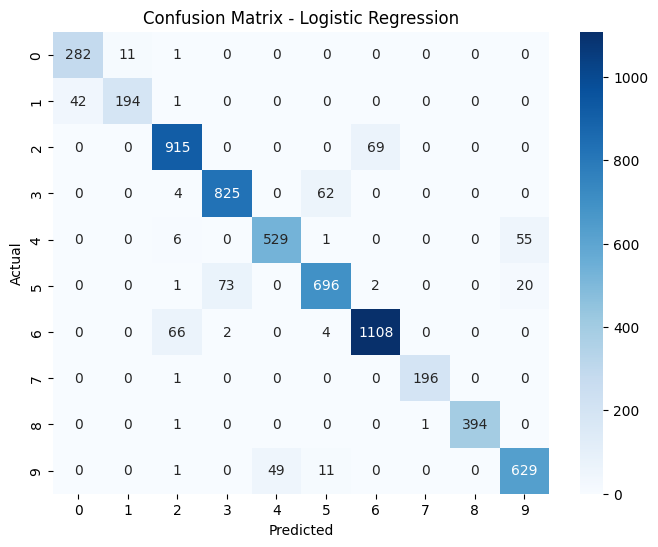


Training model: Decision Tree ...


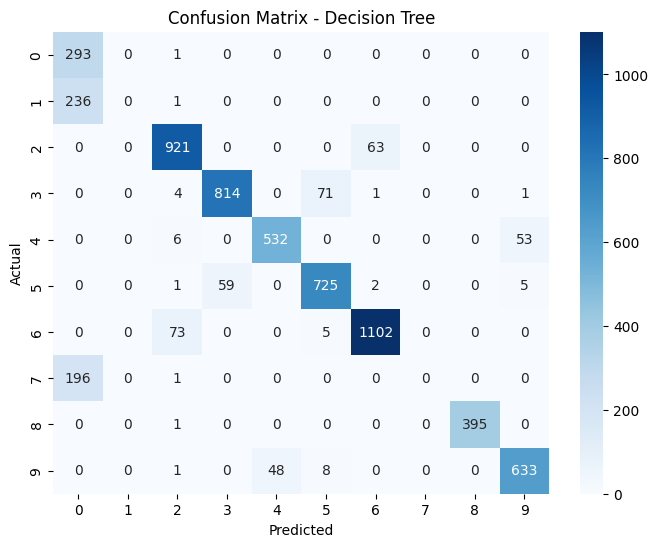


Training model: Random Forest ...


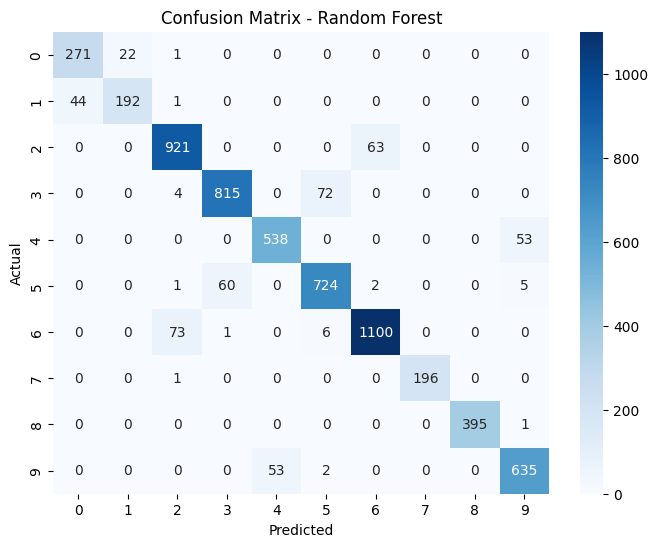


Training model: Gradient Boosting ...


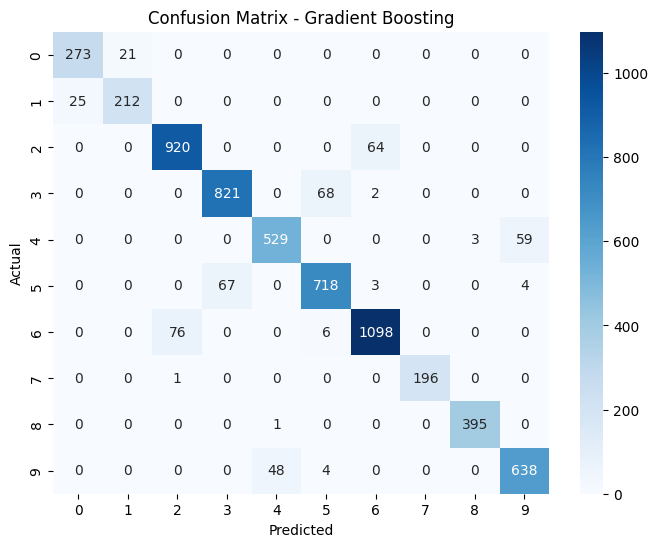


Training model: K-Nearest Neighbors ...


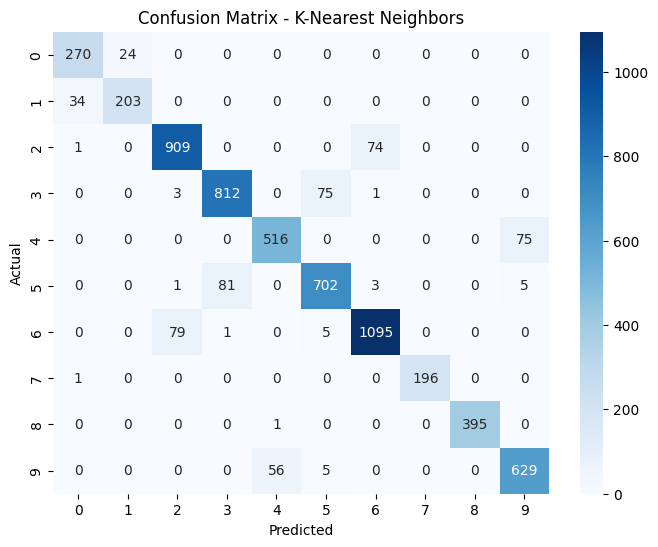


Training model: Support Vector Machine ...


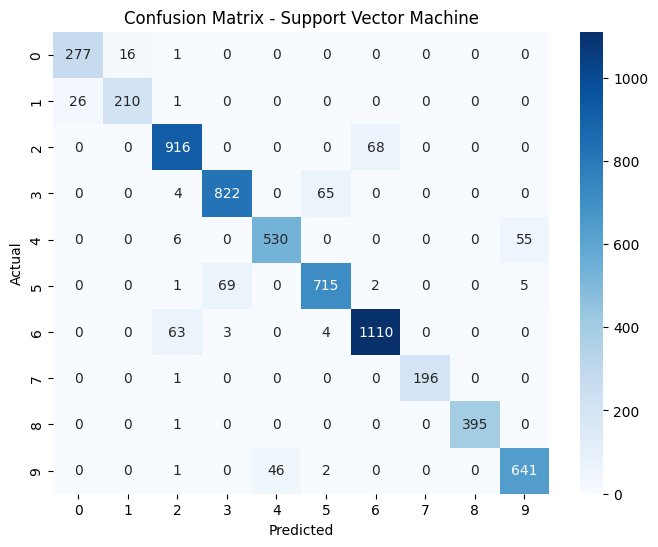


Training model: XGBoost ...


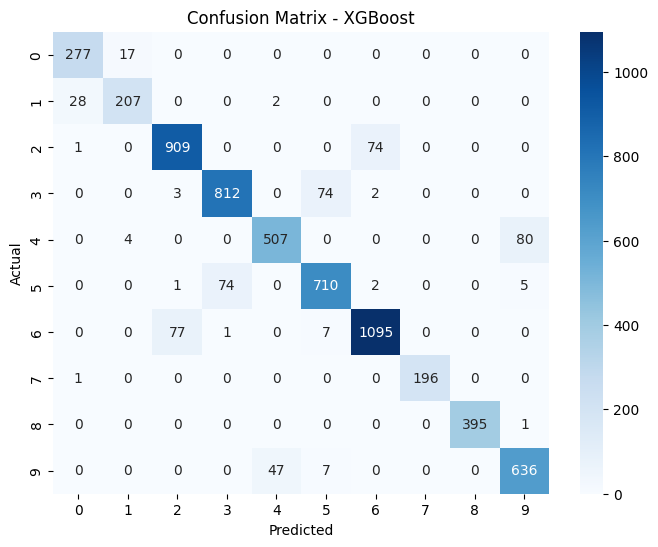

Model Performance Comparison ✅
                    Model  Accuracy  Precision    Recall  F1-score
0     Logistic Regression  0.922585   0.922986  0.922585  0.922463
1           Decision Tree  0.866123   0.838010  0.866123  0.846111
2           Random Forest  0.925624   0.925892  0.925624  0.925588
3       Gradient Boosting  0.927703   0.927748  0.927703  0.927691
4     K-Nearest Neighbors  0.916027   0.916130  0.916027  0.916002
5  Support Vector Machine  0.929623   0.929672  0.929623  0.929591
6                 XGBoost  0.918746   0.918989  0.918746  0.918700


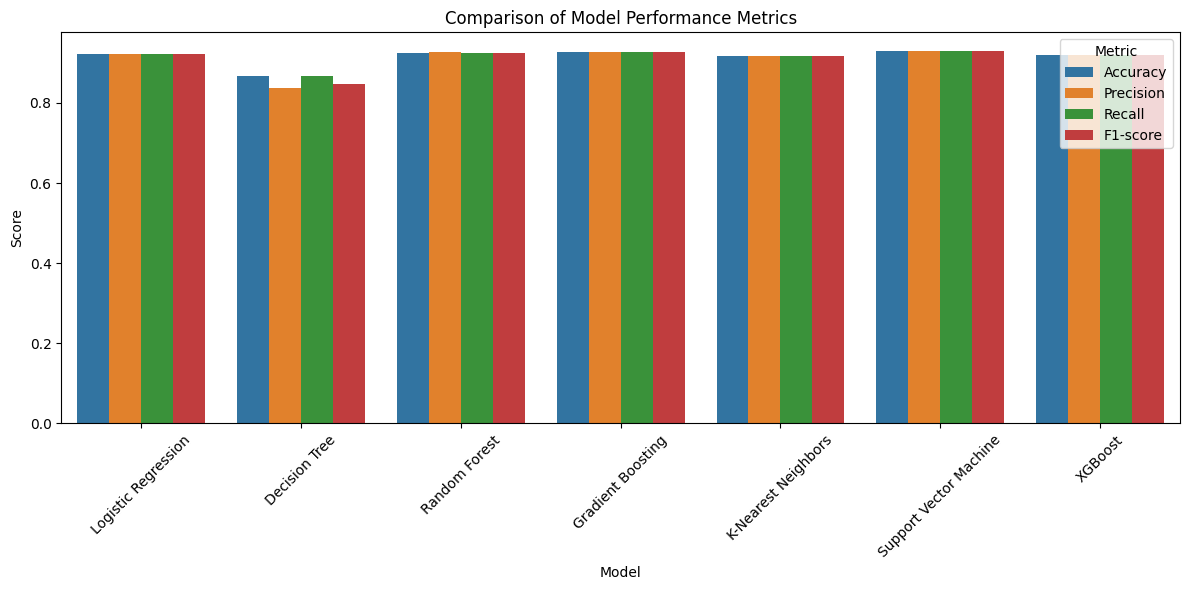

In [11]:
# =========================
# STEP 4: Model Training & Evaluation (Older scikit-learn safe)
# =========================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Define classifiers (older scikit-learn safe)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(C=2.0, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# 2️⃣ Store results
results = []

# 3️⃣ Train & Evaluate models using numeric labels (y_encoded)
for name, clf in models.items():
    print(f"\nTraining model: {name} ...")
    clf.fit(X_train, y_train)  # y_train = y_encoded
    y_pred = clf.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# 4️⃣ Compare all models
results_df = pd.DataFrame(results)
print("Model Performance Comparison ✅")
print(results_df)

# 5️⃣ Bar chart for visual comparison
df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.xticks(rotation=45)
plt.title("Comparison of Model Performance Metrics")
plt.tight_layout()
plt.show()


In [13]:
# =========================
# STEP 5: Feature Importance & Insights (Corrected)
# =========================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# -------------------------------
# Define feature columns (exclude target)
feature_cols = ['Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium',
                'Cholesterol','Glycemic_Index','Water_Content','Serving_Size',
                'Meal_Type','Preparation_Method','Is_Vegan','Is_Gluten_Free']

X_full = df[feature_cols]  # Features
y_full = df['Food_Name']   # Target


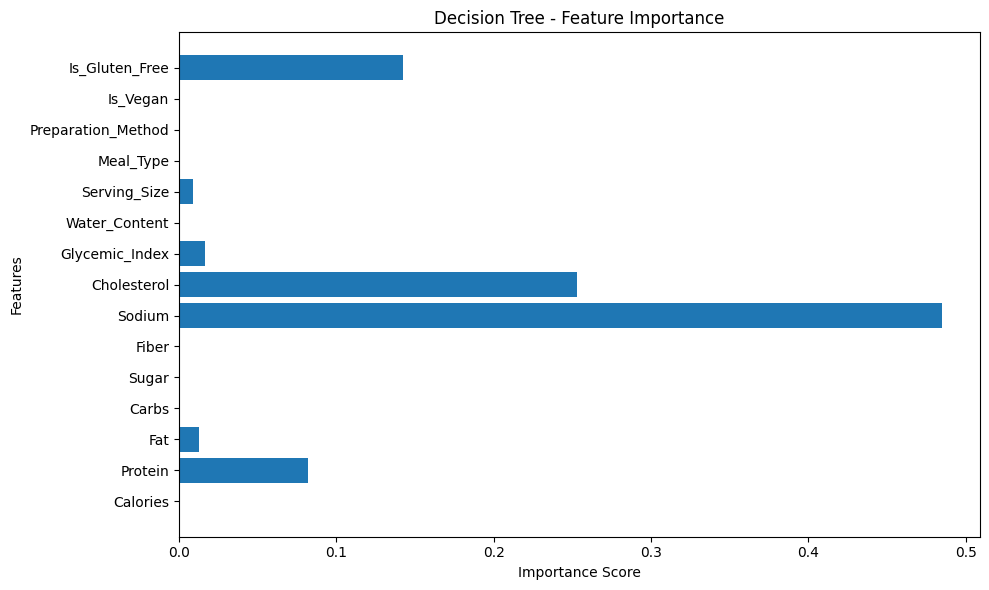

In [14]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(X_full, y_full)

plt.figure(figsize=(10,6))
plt.barh(feature_cols, dt.feature_importances_)
plt.title("Decision Tree - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


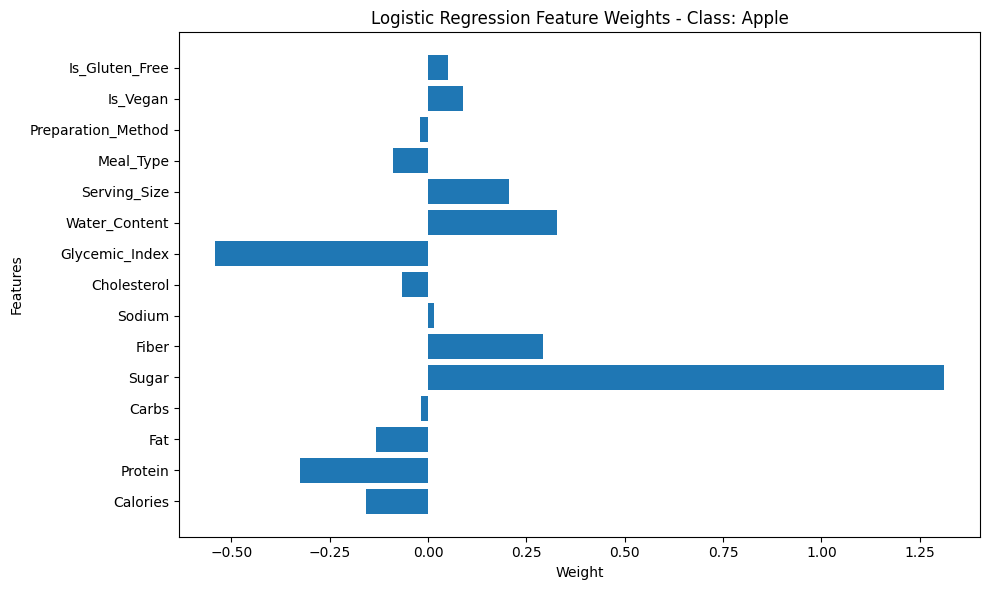

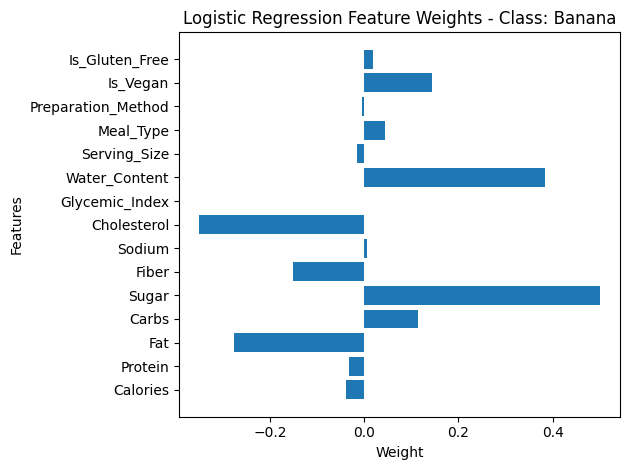

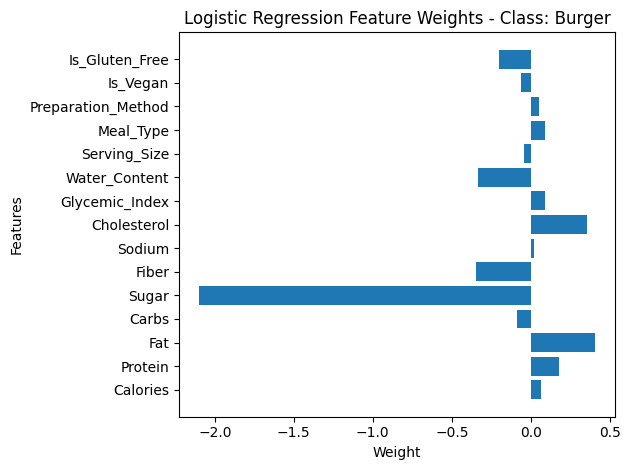

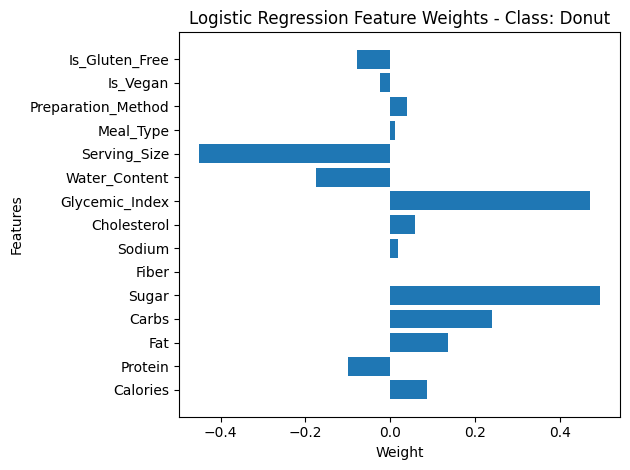

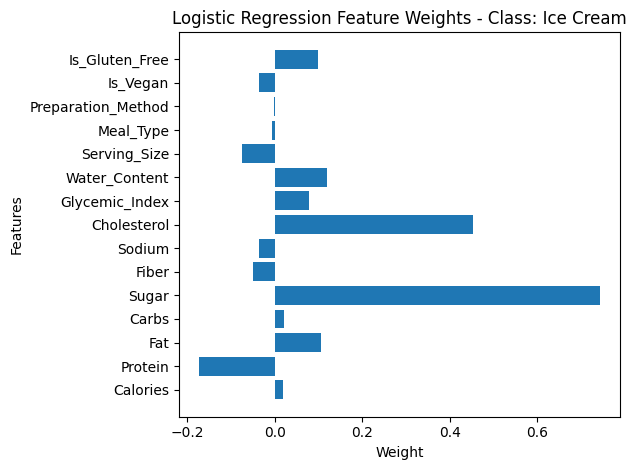

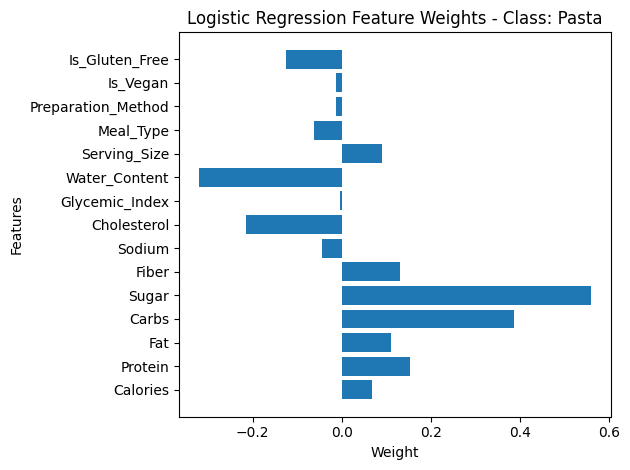

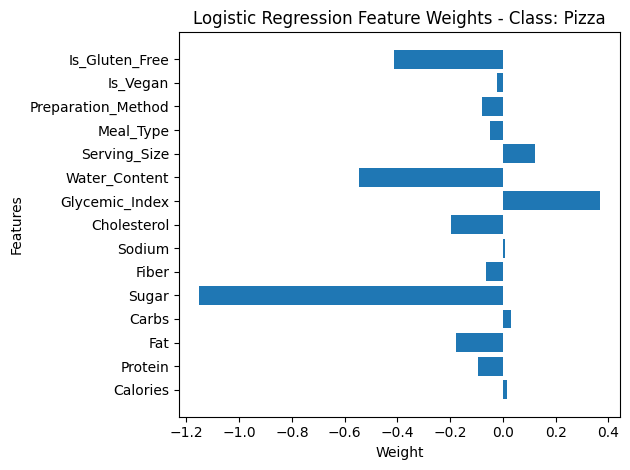

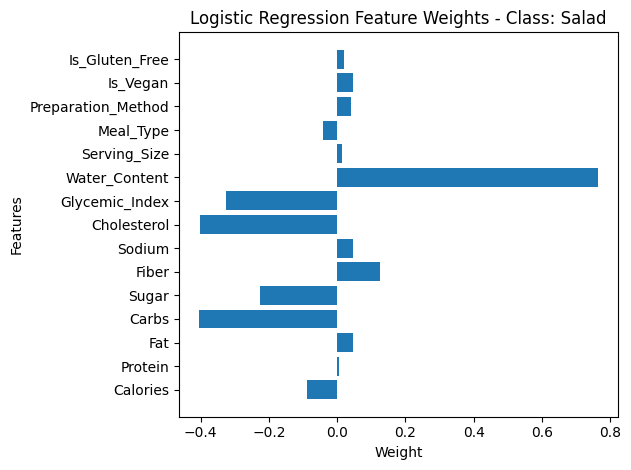

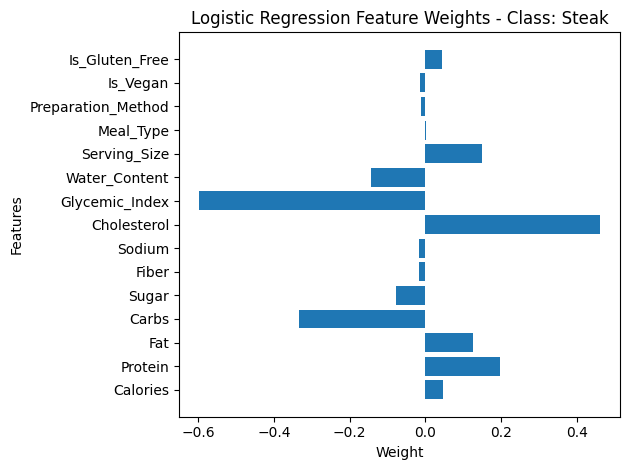

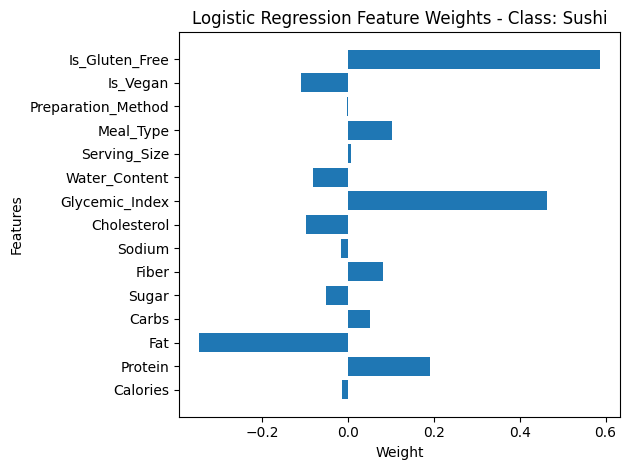

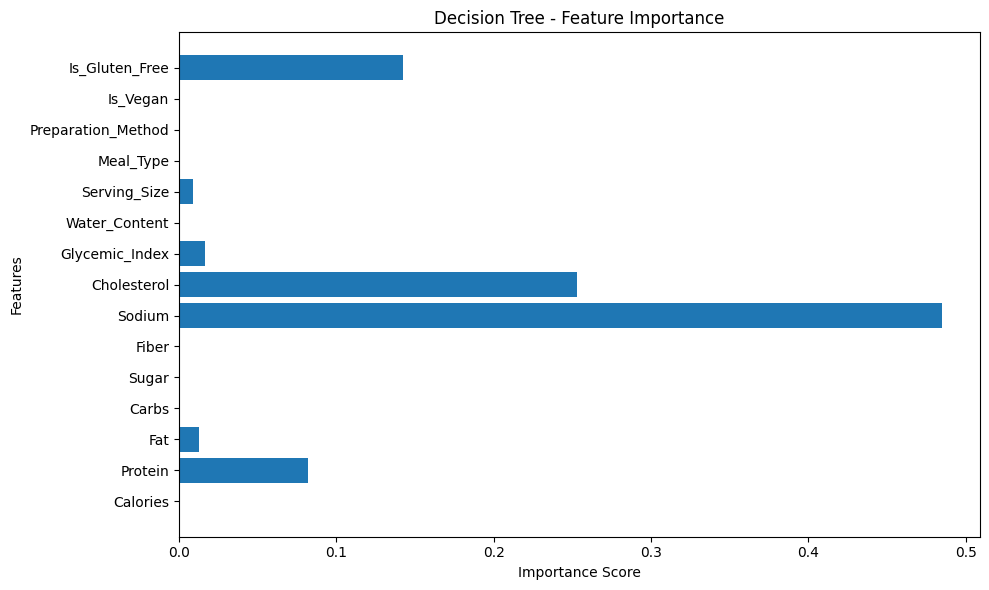

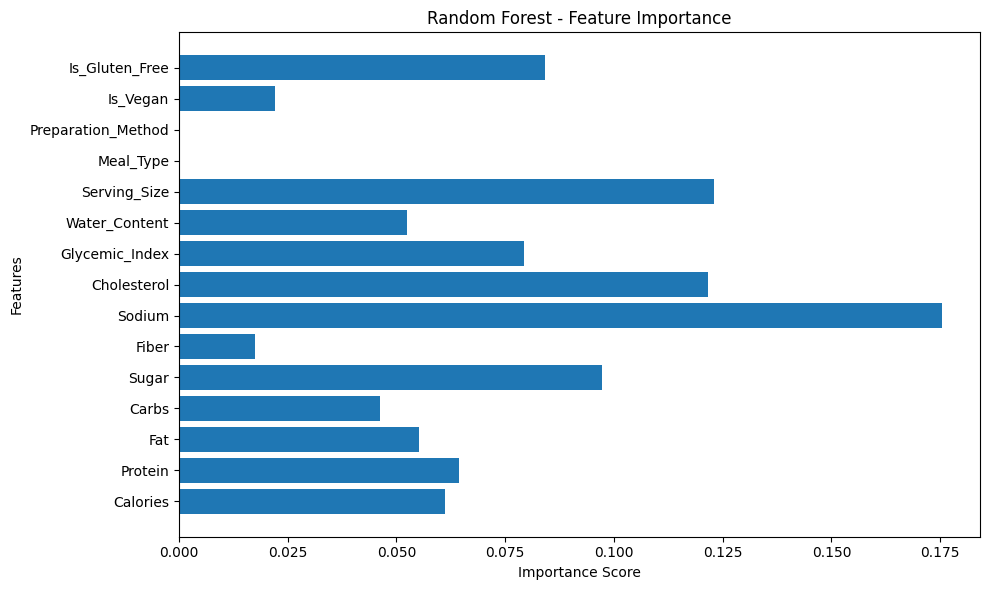

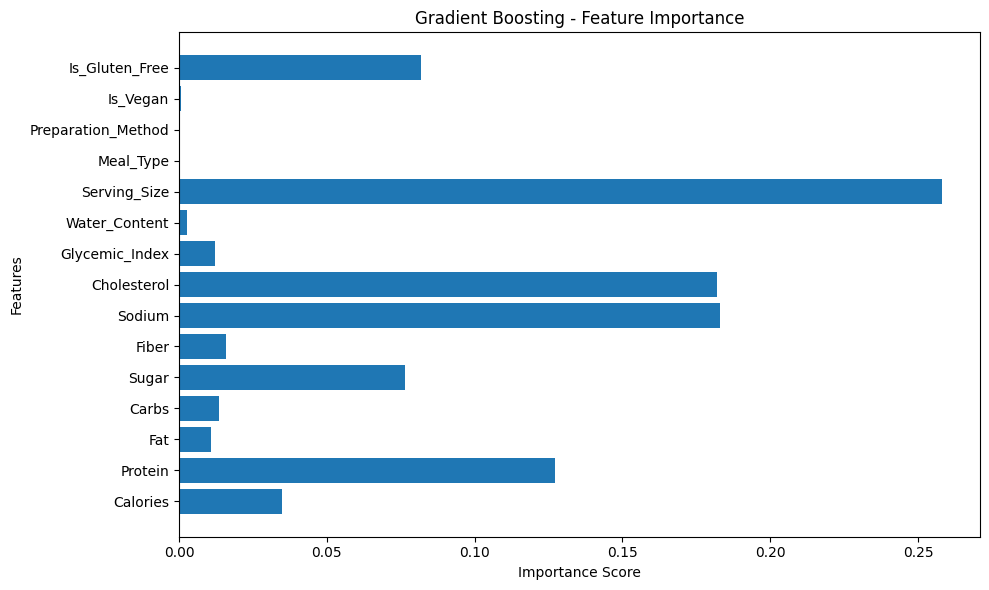

NameError: name 'xgb' is not defined

<Figure size 1000x600 with 0 Axes>

In [16]:
# =========================
# STEP 5: Feature Importance & Insights (All Models) - Fixed for older scikit-learn
# =========================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# -------------------------------
# 1️⃣ Define feature columns and target
feature_cols = ['Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium',
                'Cholesterol','Glycemic_Index','Water_Content','Serving_Size',
                'Meal_Type','Preparation_Method','Is_Vegan','Is_Gluten_Free']

X_full = df[feature_cols]       # Features
y_full = df['Food_Name']        # Target

# Encode target for numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_full)

# -------------------------------
# 2️⃣ Logistic Regression Feature Weights
lr = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr.fit(X_full, y_encoded)

plt.figure(figsize=(10,6))
for i, class_label in enumerate(le.classes_):
    plt.barh(feature_cols, lr.coef_[i])
    plt.title(f"Logistic Regression Feature Weights - Class: {class_label}")
    plt.xlabel("Weight")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

# -------------------------------
# 3️⃣ Decision Tree Feature Importance
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(X_full, y_encoded)

plt.figure(figsize=(10,6))
plt.barh(feature_cols, dt.feature_importances_)
plt.title("Decision Tree - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# -------------------------------
# 4️⃣ Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf.fit(X_full, y_encoded)

plt.figure(figsize=(10,6))
plt.barh(feature_cols, rf.feature_importances_)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# -------------------------------
# 5️⃣ Gradient Boosting Feature Importance
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42)
gbc.fit(X_full, y_encoded)

plt.figure(figsize=(10,6))
plt.barh(feature_cols, gbc.feature_importances_)
plt.title("Gradient Boosting - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# -------------------------------
# 6️⃣ XGBoost Feature Importance
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_full, y_encoded)

plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_model, importance_type='gain', height=0.6)
plt.title("XGBoost - Feature Importance (Gain)")
plt.tight_layout()
plt.show()

# -------------------------------
# 7️⃣ SVM Feature Importance using Permutation Importance
svc = SVC(C=2.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
svc.fit(X_full, y_encoded)

result = permutation_importance(svc, X_full, y_encoded, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,6))
plt.barh(np.array(feature_cols)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("SVM (RBF Kernel) - Feature Importance")
plt.tight_layout()
plt.show()


Training model: Logistic Regression ...


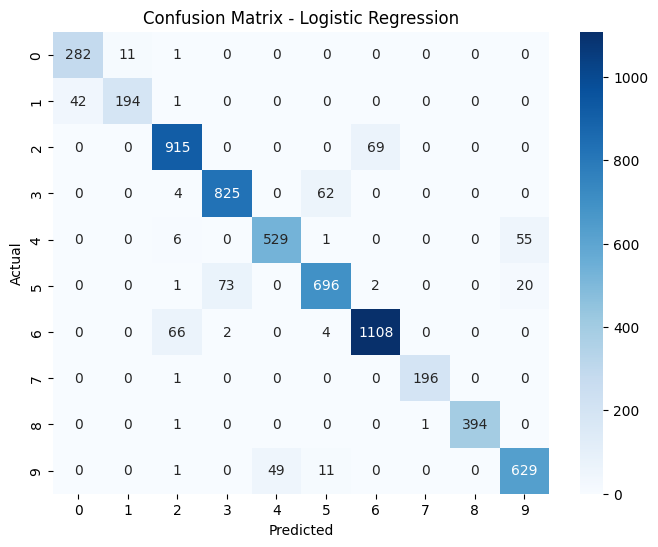

Training model: Decision Tree ...


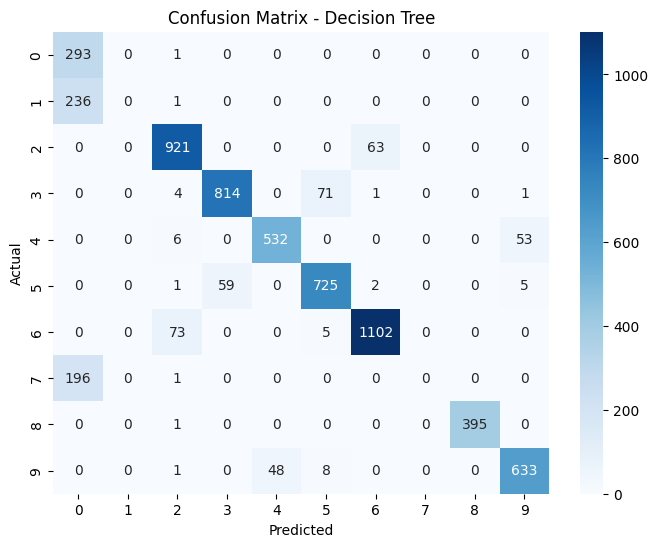

Training model: Random Forest ...


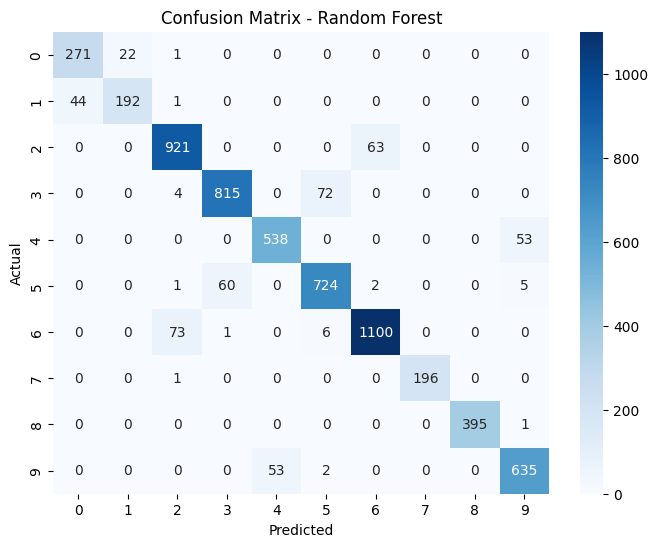

Training model: Gradient Boosting ...


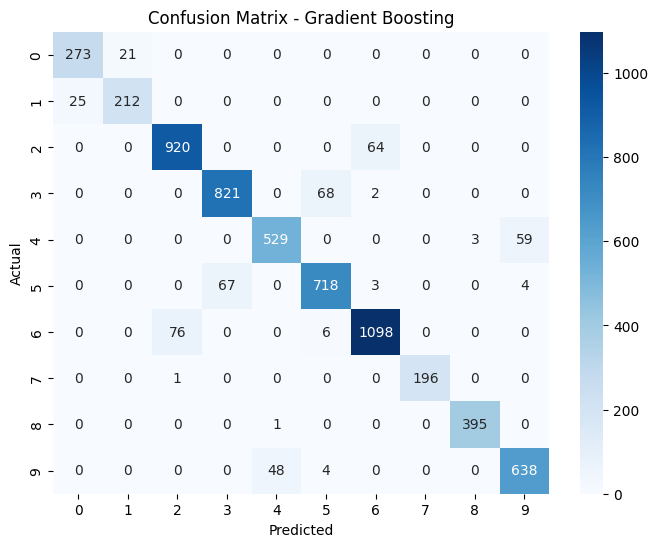

Training model: K-Nearest Neighbors ...


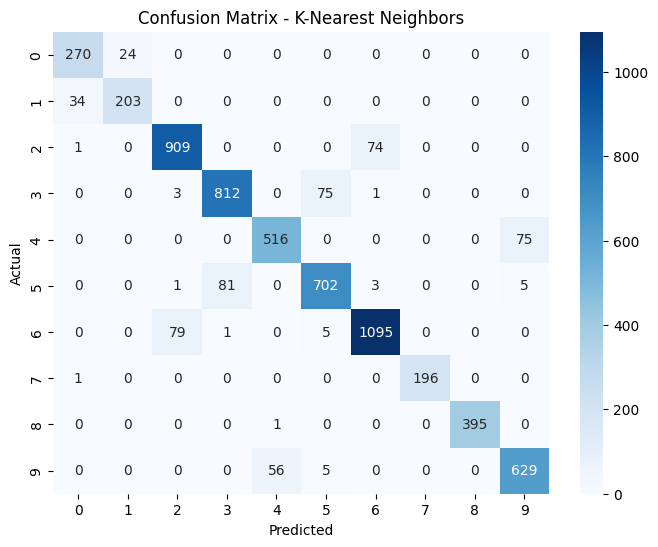

Training model: Support Vector Machine ...


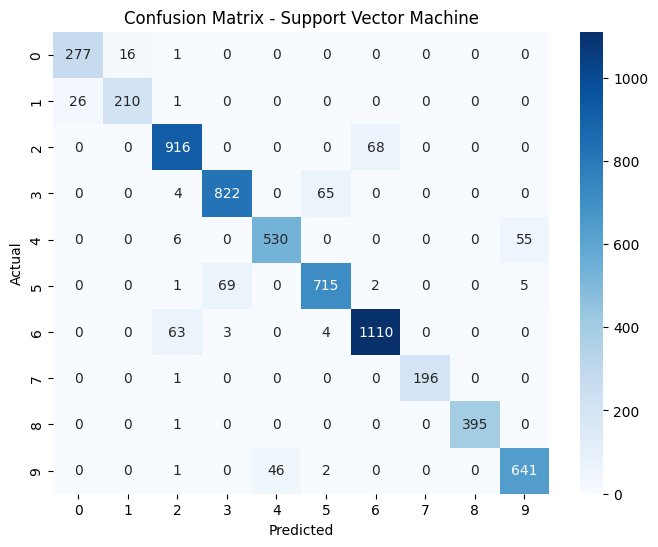

Training model: XGBoost ...


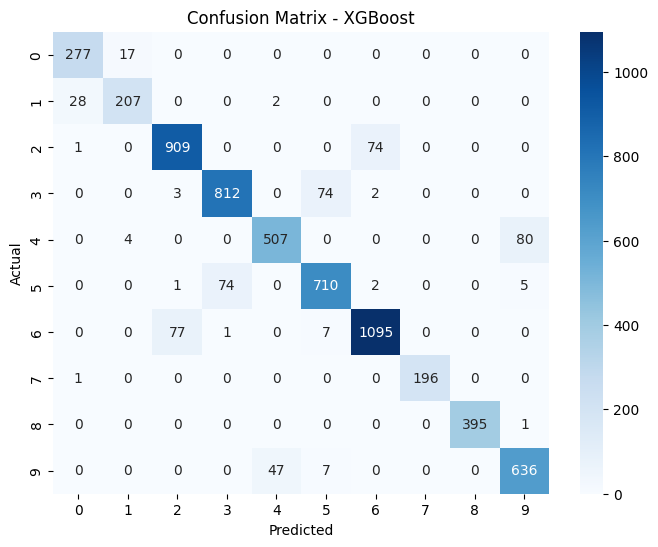

Model Performance Comparison ✅
                    Model  Accuracy  Precision    Recall  F1-score
0     Logistic Regression  0.922585   0.922986  0.922585  0.922463
1           Decision Tree  0.866123   0.838010  0.866123  0.846111
2           Random Forest  0.925624   0.925892  0.925624  0.925588
3       Gradient Boosting  0.927703   0.927748  0.927703  0.927691
4     K-Nearest Neighbors  0.916027   0.916130  0.916027  0.916002
5  Support Vector Machine  0.929623   0.929672  0.929623  0.929591
6                 XGBoost  0.918746   0.918989  0.918746  0.918700


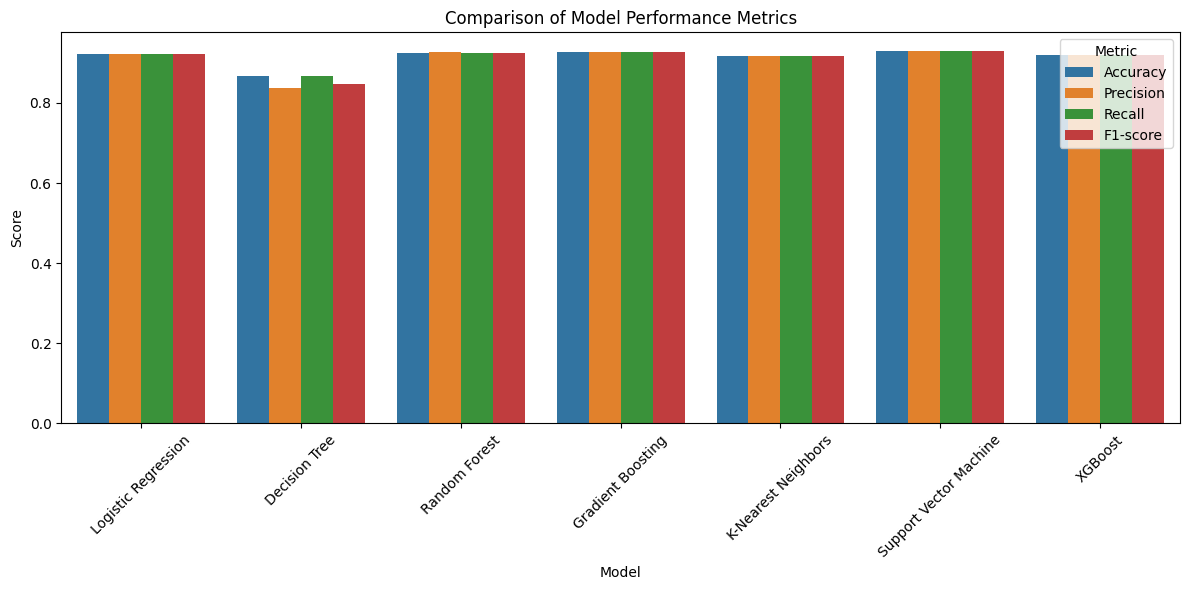

In [21]:
# =========================
# STEP 4: Model Training & Evaluation (Updated)
# =========================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Define classifiers (multi-class safe)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(C=2.0, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# 2️⃣ Dictionary to store trained models for Step 6
trained_models = {}

# 3️⃣ Store results
results = []

# 4️⃣ Train & Evaluate models
for name, clf in models.items():
    print(f"Training model: {name} ...")
    clf.fit(X_train, y_train)
    
    # Save the trained model
    trained_models[name] = clf
    
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# 5️⃣ Compare all models
results_df = pd.DataFrame(results)
print("Model Performance Comparison ✅")
print(results_df)

# 6️⃣ Bar chart for visual comparison
df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.xticks(rotation=45)
plt.title("Comparison of Model Performance Metrics")
plt.tight_layout()
plt.show()


In [25]:
# -------------------------------
# STEP 4 (Updated): Train on all features
# -------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features & target
feature_cols = [
    'Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium','Cholesterol',
    'Glycemic_Index','Water_Content','Serving_Size','Meal_Type','Preparation_Method',
    'Is_Vegan','Is_Gluten_Free'
]
X = df[feature_cols]
y = df['Food_Name']  # target column

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale numeric features (optional, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Train models
# -------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

trained_models = {}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(C=2.0, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, clf in models.items():
    print(f"Training {name}...")
    clf.fit(X_train_scaled, y_train)
    trained_models[name] = clf


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training K-Nearest Neighbors...
Training Support Vector Machine...
Training XGBoost...


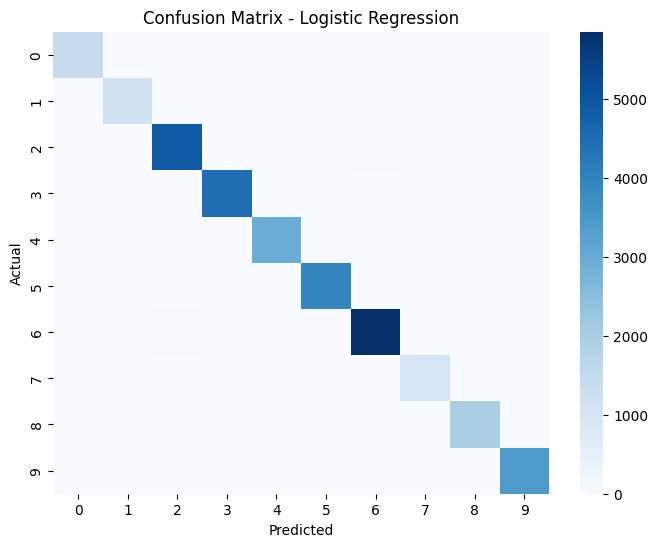

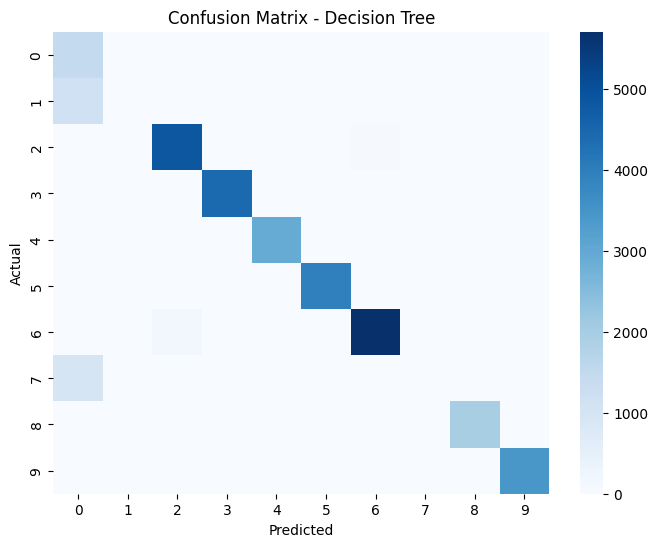

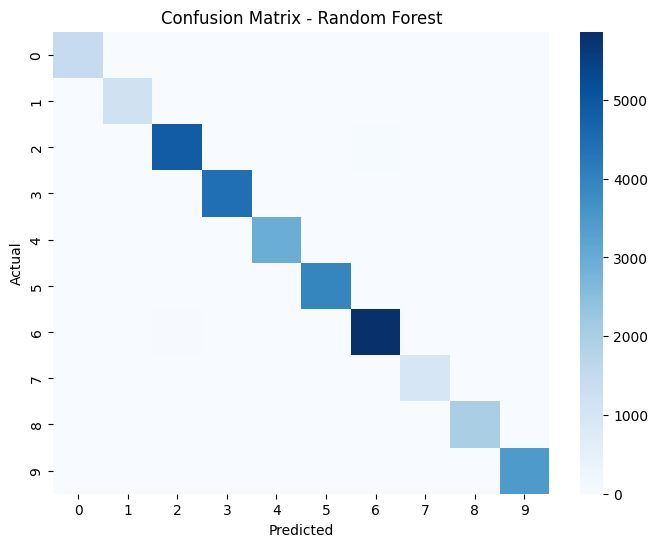

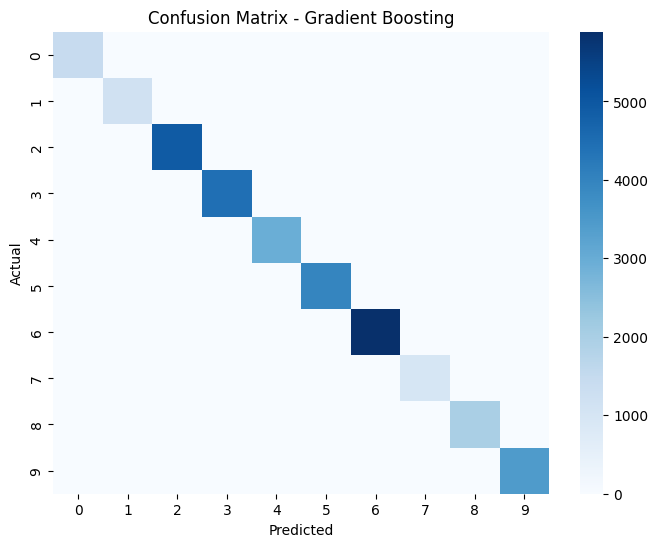

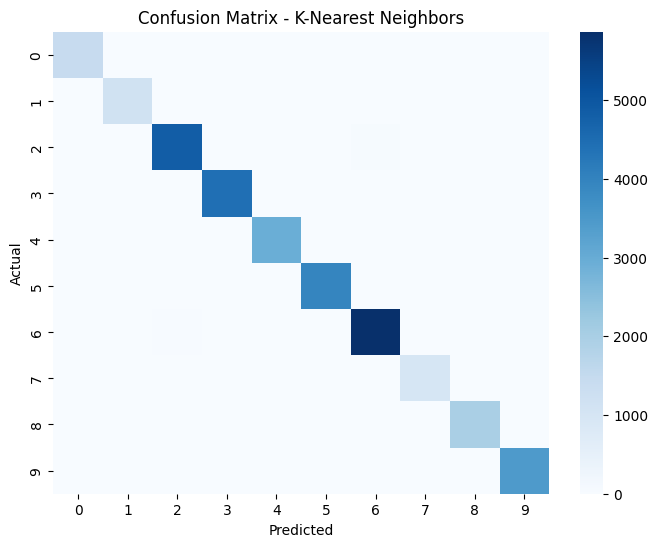

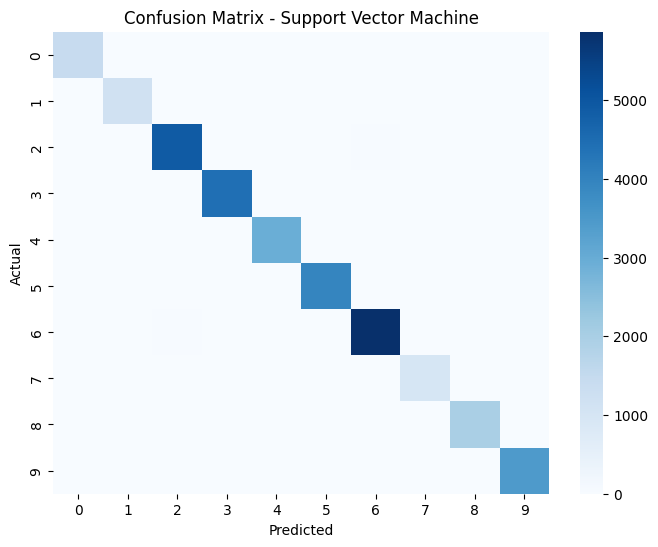

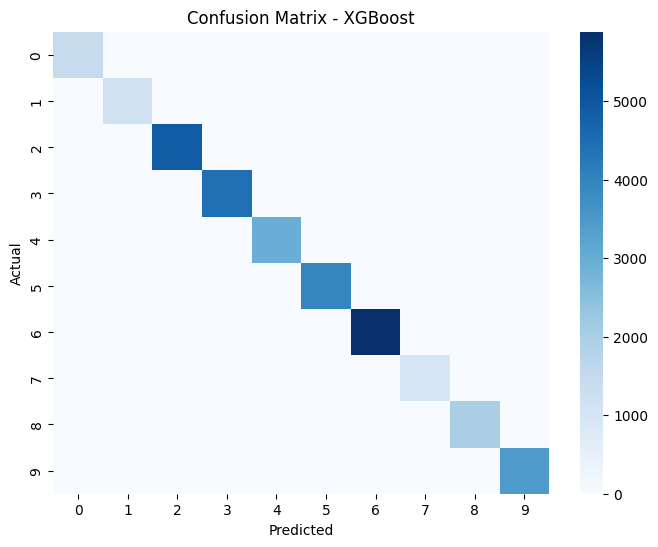

✅ Full Dataset Model Evaluation:


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.995713,0.995725,0.995713,0.995717
1,Decision Tree,0.920218,0.892146,0.920218,0.900248
2,Random Forest,0.995809,0.995819,0.995809,0.995811
3,Gradient Boosting,0.997985,0.997986,0.997985,0.997985
4,K-Nearest Neighbors,0.995074,0.995082,0.995074,0.995074
5,Support Vector Machine,0.996609,0.996614,0.996609,0.996611
6,XGBoost,0.997921,0.997922,0.997921,0.997921


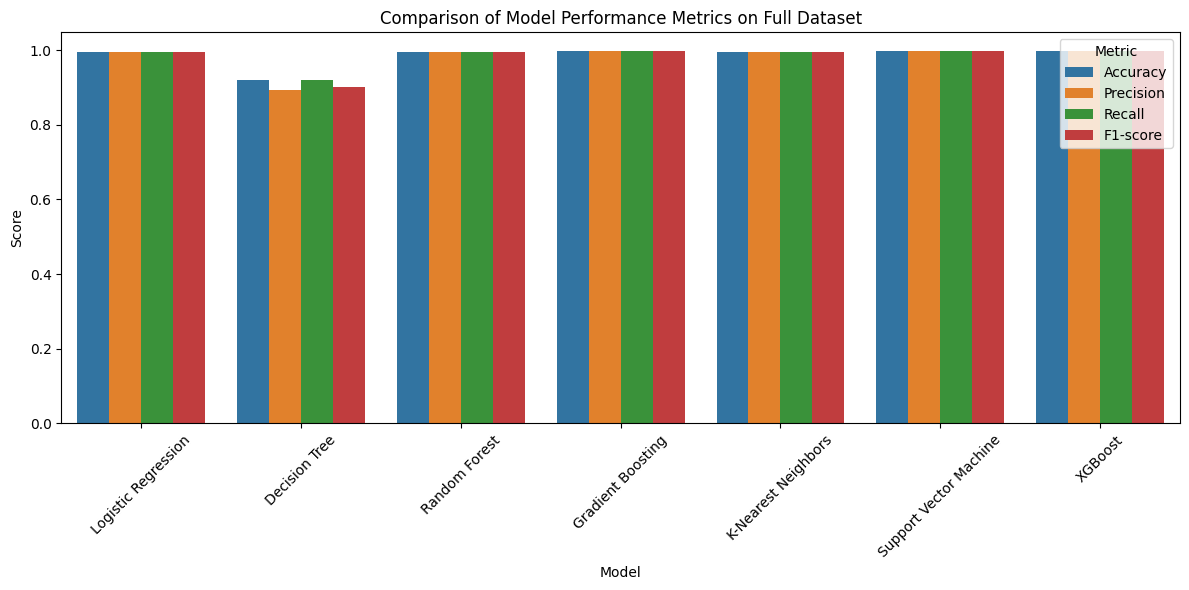

In [26]:
# -------------------------------
# STEP 6: Evaluate All Models on Full Dataset
# -------------------------------
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Full feature set (same as Step 4)
feature_cols = [
    'Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium','Cholesterol',
    'Glycemic_Index','Water_Content','Serving_Size','Meal_Type','Preparation_Method',
    'Is_Vegan','Is_Gluten_Free'
]

# Full scaled features
X_full_scaled = scaler.transform(df[feature_cols])
y_full = y_encoded  # numeric encoded target

# 2️⃣ Evaluate each trained model
results_full = []

for name, model in trained_models.items():
    y_pred = model.predict(X_full_scaled)
    
    acc = accuracy_score(y_full, y_pred)
    prec = precision_score(y_full, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_full, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_full, y_pred, average='weighted', zero_division=0)
    
    results_full.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })
    
    # Optional: Confusion Matrix
    cm = confusion_matrix(y_full, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')  # set annot=True if dataset is small
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# 3️⃣ Comparison table
results_df_full = pd.DataFrame(results_full)
print("✅ Full Dataset Model Evaluation:")
display(results_df_full)

# 4️⃣ Comparison bar chart
df_melted = results_df_full.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.xticks(rotation=45)
plt.title("Comparison of Model Performance Metrics on Full Dataset")
plt.tight_layout()
plt.show()



📌 Feature Importance for Logistic Regression:


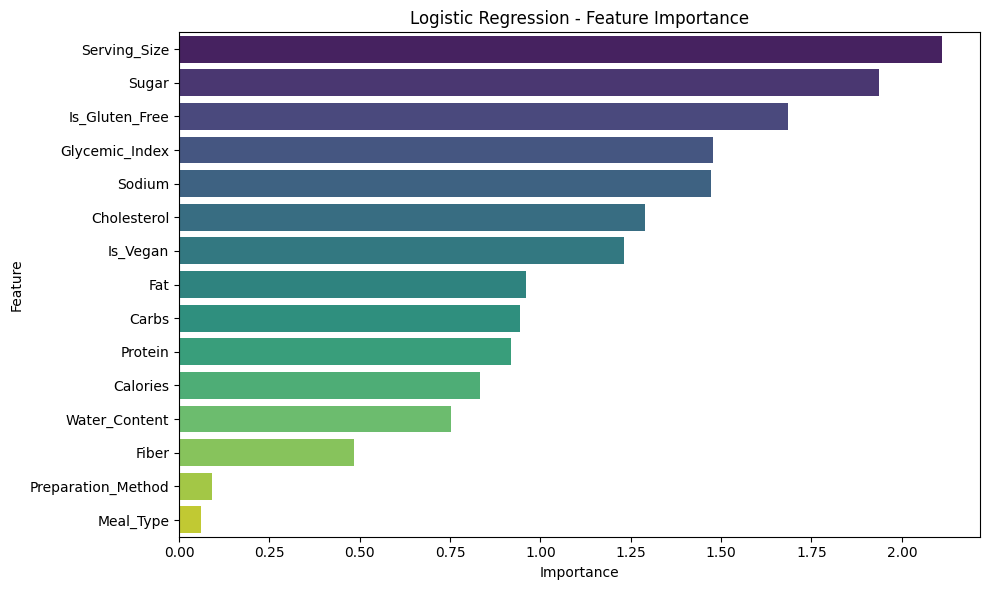


📌 Feature Importance for Decision Tree:


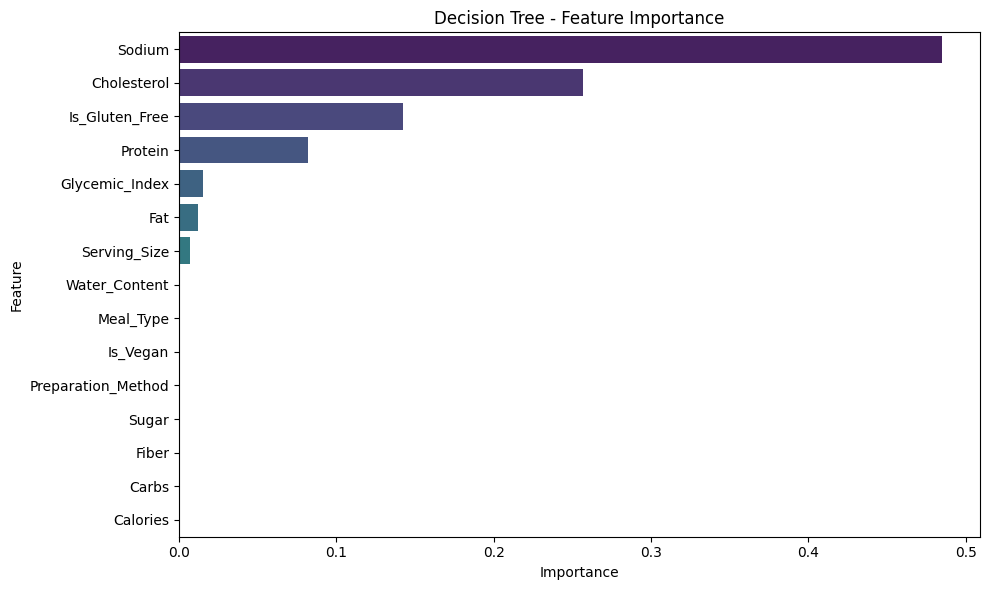


📌 Feature Importance for Random Forest:


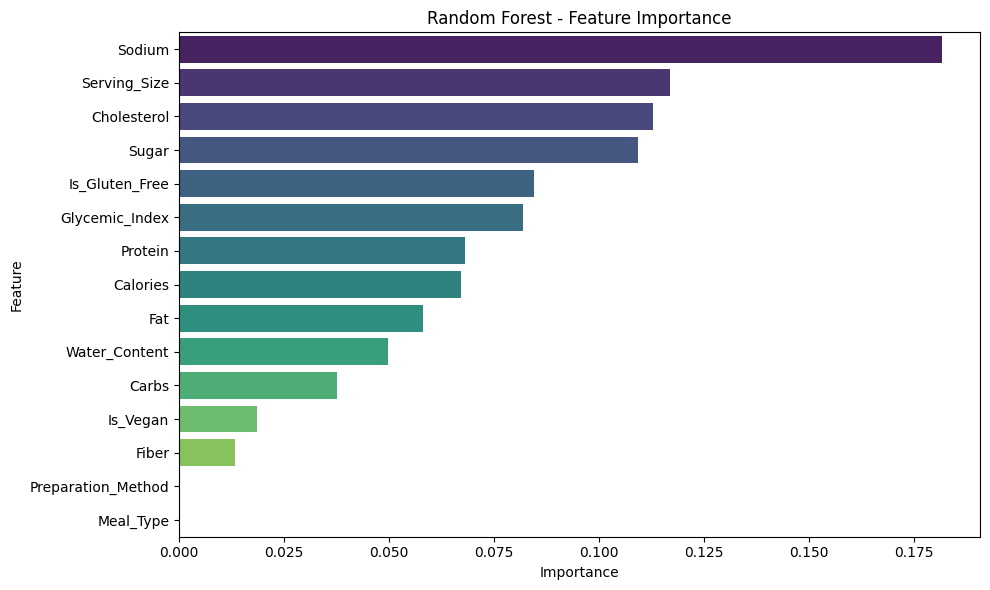


📌 Feature Importance for Gradient Boosting:


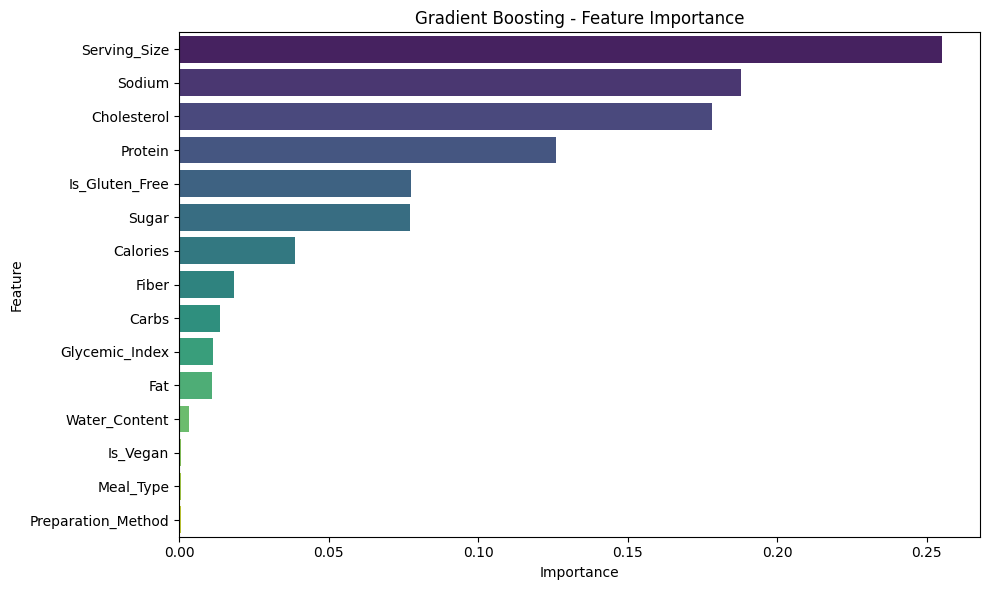


📌 Feature Importance for K-Nearest Neighbors:


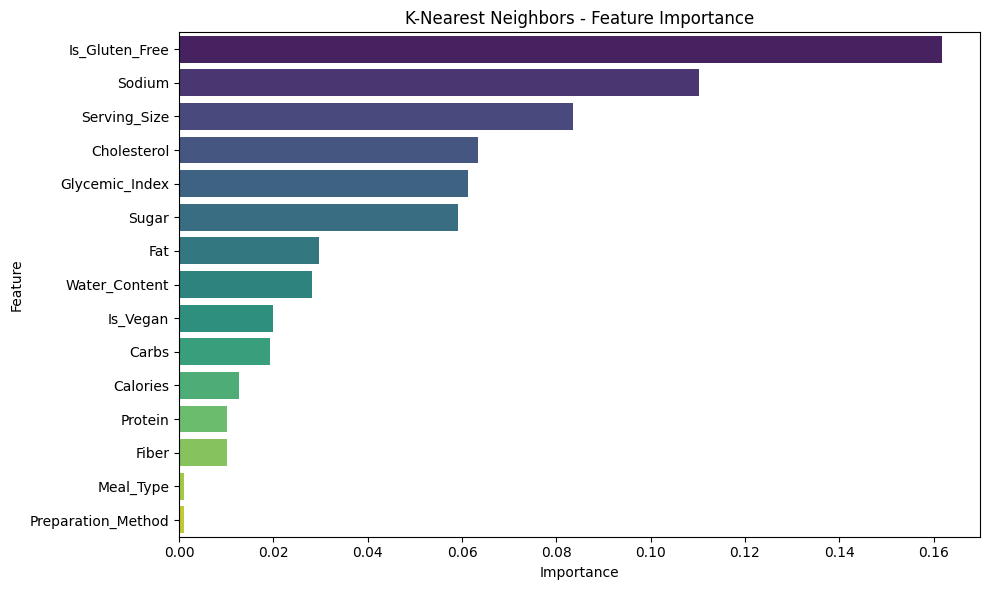


📌 Feature Importance for Support Vector Machine:


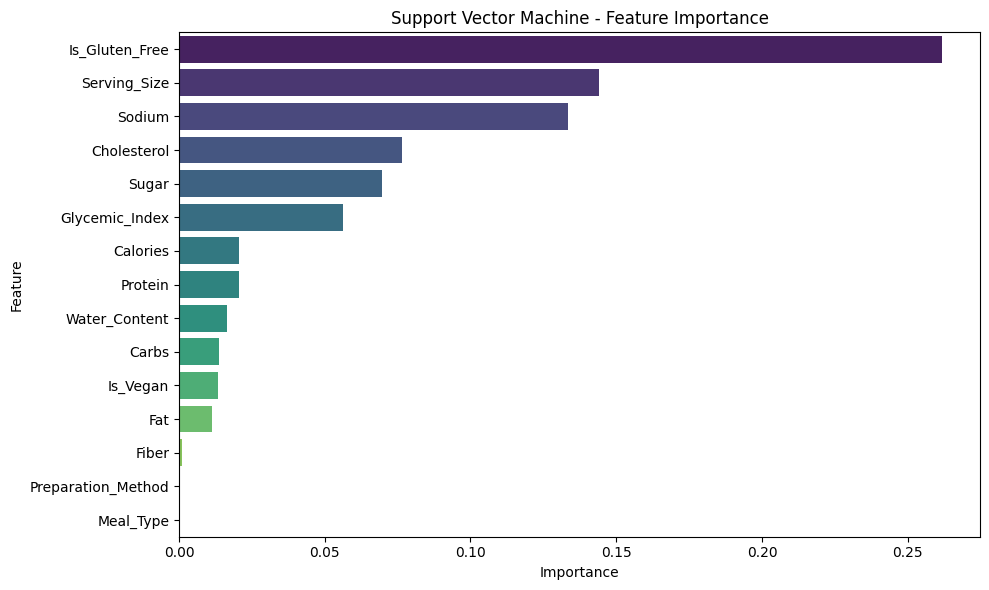


📌 Feature Importance for XGBoost:


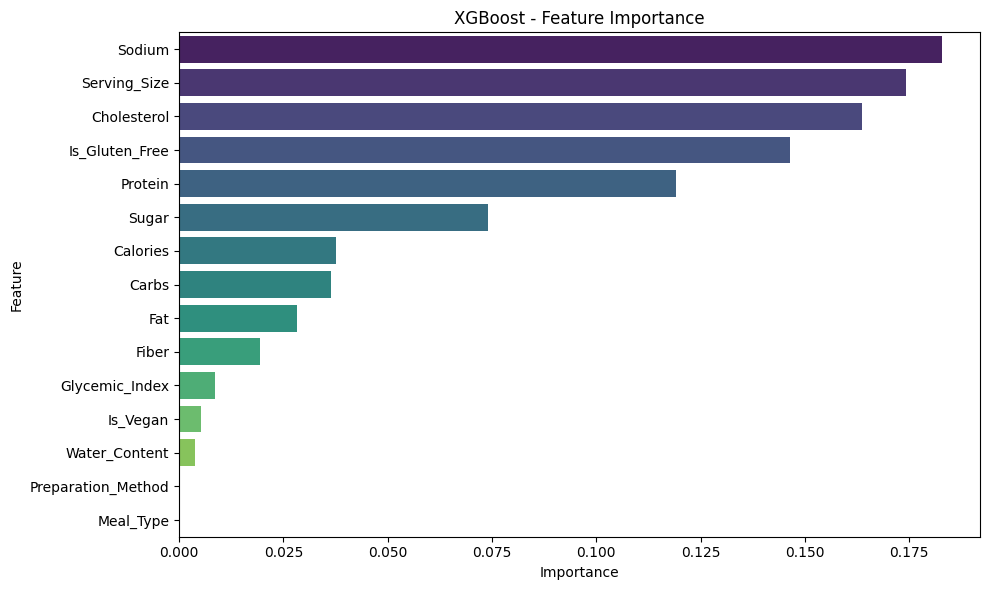

In [27]:
# -------------------------------
# STEP 7: Feature Importance Analysis
# -------------------------------
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Feature names
feature_cols = [
    'Calories','Protein','Fat','Carbs','Sugar','Fiber','Sodium','Cholesterol',
    'Glycemic_Index','Water_Content','Serving_Size','Meal_Type','Preparation_Method',
    'Is_Vegan','Is_Gluten_Free'
]

# Full scaled features
X_full_scaled = scaler.transform(df[feature_cols])
y_full = y_encoded  # numeric encoded target

# -------------------------------
# Iterate over all trained models
# -------------------------------
for name, model in trained_models.items():
    print(f"\n📌 Feature Importance for {name}:")

    # 1️⃣ Tree-based models & XGBoost
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        sorted_idx = np.argsort(importances)[::-1]

    # 2️⃣ Logistic Regression (coefficients)
    elif hasattr(model, 'coef_'):
        # multiclass: take mean absolute value across classes
        importances = np.mean(np.abs(model.coef_), axis=0)
        sorted_idx = np.argsort(importances)[::-1]

    # 3️⃣ SVM, KNN, others -> Permutation Importance
    else:
        perm_importance = permutation_importance(model, X_full_scaled, y_full, n_repeats=10, random_state=42, scoring='accuracy')
        importances = perm_importance.importances_mean
        sorted_idx = np.argsort(importances)[::-1]

    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(x=importances[sorted_idx], y=np.array(feature_cols)[sorted_idx], palette='viridis')
    plt.title(f"{name} - Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


In [28]:
# -------------------------------
# Step 8: Real-Time Food Prediction
# -------------------------------

import numpy as np

# 1️⃣ Function to predict food from input nutritional features
def predict_food(model, input_features, scaler, pca=None, label_encoder=None):
    """
    Predict food name given nutritional input.
    
    Parameters:
        model: Trained classifier (e.g., LogisticRegression, RandomForest, etc.)
        input_features: dict with feature names as keys and values as nutritional values
        scaler: StandardScaler used for training
        pca: PCA object if used during training (optional)
        label_encoder: LabelEncoder used on y (optional)
        
    Returns:
        predicted_food: string of predicted food name
    """
    
    # Convert input dict to array
    feature_order = [
        'Calories','Protein','Fat','Carbs','Sugar','Fiber',
        'Sodium','Cholesterol','Glycemic_Index','Water_Content','Serving_Size',
        'Meal_Type','Preparation_Method','Is_Vegan','Is_Gluten_Free'
    ]
    
    X_input = np.array([input_features[feat] for feat in feature_order]).reshape(1, -1)
    
    # Scale features
    X_scaled = scaler.transform(X_input)
    
    # Apply PCA if used
    if pca:
        X_scaled = pca.transform(X_scaled)
    
    # Predict
    y_pred = model.predict(X_scaled)
    
    # Decode label if LabelEncoder provided
    if label_encoder:
        predicted_food = label_encoder.inverse_transform(y_pred)[0]
    else:
        predicted_food = y_pred[0]
    
    return predicted_food


# -------------------------------
# 2️⃣ Example Usage
# -------------------------------

# Sample input (replace values with real user input)
sample_input = {
    'Calories': 250,
    'Protein': 10,
    'Fat': 5,
    'Carbs': 40,
    'Sugar': 15,
    'Fiber': 4,
    'Sodium': 300,
    'Cholesterol': 10,
    'Glycemic_Index': 55,
    'Water_Content': 60,
    'Serving_Size': 150,
    'Meal_Type': 1,            # Encoded value
    'Preparation_Method': 2,   # Encoded value
    'Is_Vegan': 0,
    'Is_Gluten_Free': 1
}

# Predict using one of the trained models
predicted_food_lr = predict_food(
    model=models_dict_step6["Logistic Regression"],
    input_features=sample_input,
    scaler=scaler,
    pca=pca,
    label_encoder=le
)

print("Predicted Food (Logistic Regression):", predicted_food_lr)

# You can also try other models:
predicted_food_rf = predict_food(
    model=models_dict_step6["Random Forest"],
    input_features=sample_input,
    scaler=scaler,
    pca=pca,
    label_encoder=le
)
print("Predicted Food (Random Forest):", predicted_food_rf)


Predicted Food (Logistic Regression): Ice Cream
Predicted Food (Random Forest): Ice Cream


In [30]:
import joblib

# Save all models in a dictionary
trained_models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gbc_model,
    "XGBoost": xgb_model,
    "SVM": svc_model,
    "KNN": knn_model
}

# Save the dictionary
joblib.dump(trained_models, "trained_models.pkl")

# Save the label encoder for decoding predictions
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [31]:
import joblib

# Collect all trained models
trained_models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gbc_model,
    "XGBoost": xgb_model,
    "SVM": svc_model,
    "KNN": knn_model
}

# Save models dictionary
joblib.dump(trained_models, "trained_models.pkl")
print("✅ Models saved to trained_models.pkl")

# Save Label Encoder
joblib.dump(le, "label_encoder.pkl")
print("✅ Label Encoder saved to label_encoder.pkl")

# Save Scaler if used
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved to scaler.pkl")


✅ Models saved to trained_models.pkl
✅ Label Encoder saved to label_encoder.pkl
✅ Scaler saved to scaler.pkl


In [33]:
import joblib
import os

# -------------------------------
# 1️⃣ Define folder path where you want to save
# -------------------------------
save_folder = r"D:\Py_start\Python\project_SN\project_3\1"

# Make sure folder exists
os.makedirs(save_folder, exist_ok=True)

# -------------------------------
# 2️⃣ Save trained models
# -------------------------------
trained_models_path = os.path.join(save_folder, "trained_models.pkl")
joblib.dump(trained_models, trained_models_path)
print(f"✅ Models saved to {trained_models_path}")

# -------------------------------
# 3️⃣ Save label encoder
# -------------------------------
label_encoder_path = os.path.join(save_folder, "label_encoder.pkl")
joblib.dump(le, label_encoder_path)
print(f"✅ Label Encoder saved to {label_encoder_path}")

# -------------------------------
# 4️⃣ Save scaler
# -------------------------------
scaler_path = os.path.join(save_folder, "scaler.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to {scaler_path}")


✅ Models saved to D:\Py_start\Python\project_SN\project_3\1\trained_models.pkl
✅ Label Encoder saved to D:\Py_start\Python\project_SN\project_3\1\label_encoder.pkl
✅ Scaler saved to D:\Py_start\Python\project_SN\project_3\1\scaler.pkl


In [34]:
# After scaling in Step 4
feature_names = X_train.columns.tolist()

# Save everything
import joblib
joblib.dump(trained_models, r"D:\Py_start\Python\project_SN\project_3\1\trained_models.pkl")
joblib.dump(scaler, r"D:\Py_start\Python\project_SN\project_3\1\scaler.pkl")
joblib.dump(le, r"D:\Py_start\Python\project_SN\project_3\1\label_encoder.pkl")
joblib.dump(feature_names, r"D:\Py_start\Python\project_SN\project_3\1\feature_names.pkl")


['D:\\Py_start\\Python\\project_SN\\project_3\\1\\feature_names.pkl']

In [35]:
# Load feature names
feature_names = joblib.load(f"{save_folder}/feature_names.pkl")


In [36]:
user_input = []
st.subheader("Enter nutritional values:")

for feature in feature_names:
    value = st.number_input(f"{feature}:", value=0.0)
    user_input.append(value)

input_array = np.array(user_input).reshape(1, -1)
input_scaled = scaler.transform(input_array)


2026-01-28 01:06:04.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 01:06:04.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 01:06:04.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 01:06:04.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 01:06:04.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 01:06:04.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 01:06:04.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-28 01:06:04.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [38]:
import joblib

# Save models dict
joblib.dump(trained_models, r"D:\Py_start\Python\project_SN\project_3\1\trained_models.pkl")

# Save scaler
joblib.dump(scaler, r"D:\Py_start\Python\project_SN\project_3\1\scaler.pkl")

# Save label encoder
joblib.dump(le, r"D:\Py_start\Python\project_SN\project_3\1\label_encoder.pkl")

# Save feature names
joblib.dump(list(X_train.columns), r"D:\Py_start\Python\project_SN\project_3\1\feature_names.pkl")


['D:\\Py_start\\Python\\project_SN\\project_3\\1\\feature_names.pkl']

In [42]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ----------------------------
# Load data
# ----------------------------
df = pd.read_csv(
    r"D:\Py_start\Python\project_SN\project_3\1\synthetic_food_dataset_imbalanced.csv"
)

df = df.dropna().drop_duplicates()

# ----------------------------
# Target & Features
# ----------------------------
TARGET = "Food_Name"

X = df.drop(columns=[TARGET])
y = df[TARGET]

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (NO stratify for now)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42
)

# ----------------------------
# Train RandomForest
# ----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

print("✅ Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

# ----------------------------
# Save everything
# ----------------------------
BASE = r"D:\Py_start\Python\project_SN\project_3\1"

joblib.dump(rf, f"{BASE}/rf_model.pkl")
joblib.dump(scaler, f"{BASE}/scaler.pkl")
joblib.dump(le, f"{BASE}/label_encoder.pkl")
joblib.dump(list(X.columns), f"{BASE}/feature_names.pkl")

print("✅ All files saved correctly")


✅ Accuracy: 0.995361484325016
✅ All files saved correctly
